In [27]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats 

In [28]:
dataset=pd.read_csv(r'C:\Users\ARADHYA\Downloads\Attrition data.csv')

In [29]:
data=dataset.copy() # deepcopy

In [30]:
# We have re-assigned the dataset into a variable name data ---- keeping hindsight for facilitating further analysis

In [31]:
dataset.head(10)

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
5,6,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,Female,...,28.0,5,7,7,7,3.0,2.0,2.0,3,3
6,7,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,Male,...,5.0,2,0,0,0,1.0,3.0,1.0,3,4
7,8,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,Male,...,10.0,2,0,0,0,1.0,2.0,3.0,3,4
8,9,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,Male,...,10.0,2,9,7,8,2.0,4.0,3.0,3,4
9,10,25,No,Non-Travel,Research & Development,7,4,Medical,1,Female,...,6.0,2,6,1,5,2.0,1.0,3.0,3,3


In [32]:
data.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


# Data Pre-processing

In [33]:
dataset.shape

(4410, 29)

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [35]:
dataset.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [50]:
dataset.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [36]:
Attrition=dataset['Attrition']   #  storing Attrition in Attrition

In [37]:
dataset.drop(['Attrition'],axis=1,inplace=True)  # Dropping Attrition from dataset

In [38]:
dataset=pd.concat([dataset,Attrition],axis=1)   #concating Attrition to the dataset

In [39]:
dataset.head()

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition
0,1,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,6,1,0,0,3.0,4.0,2.0,3,3,No
1,2,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,3,5,1,4,3.0,2.0,4.0,2,4,Yes
2,3,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,2,5,0,3,2.0,2.0,1.0,3,3,No
3,4,38,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,5,8,7,5,4.0,4.0,3.0,2,3,No
4,5,32,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,2,6,0,4,4.0,1.0,3.0,3,3,No


In [40]:
Attrition=data['Attrition']   #  storing Attrition in Attrition

In [41]:
data.drop(['Attrition'],axis=1,inplace=True)   # Dropping Attrition from data

In [42]:
data=pd.concat([data,Attrition],axis=1)     #concating Attrition to the data

In [43]:
data.head()

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition
0,1,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,6,1,0,0,3.0,4.0,2.0,3,3,No
1,2,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,3,5,1,4,3.0,2.0,4.0,2,4,Yes
2,3,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,2,5,0,3,2.0,2.0,1.0,3,3,No
3,4,38,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,5,8,7,5,4.0,4.0,3.0,2,3,No
4,5,32,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,2,6,0,4,4.0,1.0,3.0,3,3,No


In [44]:
data.columns

Index(['EmployeeID', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition'],
      dtype='object')

In [45]:
dataset.isnull().sum()    # checking null values

EmployeeID                  0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
Attrition                   0
dtype: int64

In [48]:
data.isnull().sum()    #checking null values 

EmployeeID                  0
Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
Attrition                   0
dtype: int64

In [ ]:
# From the above analysis dataset and data have null values in the following Attributes 
# 1) NumcompaniesWorked 2) EnvironmentSatisfaction 3) JobSatisfaction 4) WorklifeBalance

In [49]:
dataset['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: count, dtype: int64

In [56]:
dataset['NumCompaniesWorked'].median()

2.0

In [57]:
dataset['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
3.0    1350
4.0    1334
2.0     856
1.0     845
Name: count, dtype: int64

In [58]:
dataset['EnvironmentSatisfaction'].median()

3.0

In [59]:
dataset['JobSatisfaction'].value_counts()

JobSatisfaction
4.0    1367
3.0    1323
1.0     860
2.0     840
Name: count, dtype: int64

In [60]:
dataset['WorkLifeBalance'].value_counts()

WorkLifeBalance
3.0    2660
2.0    1019
4.0     454
1.0     239
Name: count, dtype: int64

In [61]:
dataset['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].median(),inplace=True)   # filling missing values by median
dataset['EnvironmentSatisfaction'].fillna(data['EnvironmentSatisfaction'].median(),inplace=True)
dataset['JobSatisfaction'].fillna(data['JobSatisfaction'].median(),inplace=True)  # 
dataset['WorkLifeBalance'].fillna(data['WorkLifeBalance'].median(),inplace=True)

In [62]:
data['NumCompaniesWorked'].fillna(data['NumCompaniesWorked'].median(),inplace=True)   # filling missing values by median
data['EnvironmentSatisfaction'].fillna(data['EnvironmentSatisfaction'].median(),inplace=True)
data['JobSatisfaction'].fillna(data['JobSatisfaction'].median(),inplace=True) 
data['WorkLifeBalance'].fillna(data['WorkLifeBalance'].median(),inplace=True)

In [63]:
dataset.isnull().sum()   # missing values removed 

EmployeeID                 0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          9
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
Attrition                  0
dtype: int64

In [64]:
data.isnull().sum()            # missing values removed 

EmployeeID                 0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          9
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
Attrition                  0
dtype: int64

In [65]:
# Based on the above analysis we can observe that the missing values has been removed

                             Data Preprocessing : Using One-Hot Encoding

In [66]:
data= pd.get_dummies(data, columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])


In [68]:
data.head(10)

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,Over18,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,51,6,2,1,Female,1,131160,1.0,Y,...,False,False,False,False,False,False,False,False,True,False
1,2,31,10,1,1,Female,1,41890,0.0,Y,...,False,False,False,False,True,False,False,False,False,True
2,3,32,17,4,1,Male,4,193280,1.0,Y,...,False,False,False,False,False,True,False,False,True,False
3,4,38,2,5,1,Male,3,83210,3.0,Y,...,False,False,False,False,False,False,False,False,True,False
4,5,32,10,1,1,Male,1,23420,4.0,Y,...,False,False,False,False,False,True,False,False,False,True
5,6,46,8,3,1,Female,4,40710,3.0,Y,...,False,False,False,True,False,False,False,False,True,False
6,7,28,11,2,1,Male,2,58130,2.0,Y,...,False,False,False,False,False,True,False,False,False,True
7,8,29,18,3,1,Male,2,31430,2.0,Y,...,False,False,False,False,False,True,False,False,True,False
8,9,31,1,3,1,Male,3,20440,0.0,Y,...,True,False,False,False,False,False,False,False,True,False
9,10,25,7,4,1,Female,4,134640,1.0,Y,...,True,False,False,False,False,False,False,True,False,False


In [67]:
data.shape

(4410, 48)

In [69]:
Attrition=data['Attrition'] 
data.drop(['Attrition'],axis=1,inplace=True)  # Dropping Attrition from data
data=pd.concat([data,Attrition],axis=1)   #concating Attrition to the data 


In [70]:
data.head()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,Over18,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,1,51,6,2,1,Female,1,131160,1.0,Y,...,False,False,False,False,False,False,False,True,False,No
1,2,31,10,1,1,Female,1,41890,0.0,Y,...,False,False,False,True,False,False,False,False,True,Yes
2,3,32,17,4,1,Male,4,193280,1.0,Y,...,False,False,False,False,True,False,False,True,False,No
3,4,38,2,5,1,Male,3,83210,3.0,Y,...,False,False,False,False,False,False,False,True,False,No
4,5,32,10,1,1,Male,1,23420,4.0,Y,...,False,False,False,False,True,False,False,False,True,No


In [71]:
data.shape

(4410, 48)

In [72]:
data.duplicated().any()

False

In [73]:
data['Gender']=data['Gender'].replace({'Female':0,'Male':1})

In [79]:
data.head()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,Over18,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,1,51,6,2,1,0,1,131160,1.0,Y,...,False,False,False,False,False,False,False,True,False,0
1,2,31,10,1,1,0,1,41890,0.0,Y,...,False,False,False,True,False,False,False,False,True,1
2,3,32,17,4,1,1,4,193280,1.0,Y,...,False,False,False,False,True,False,False,True,False,0
3,4,38,2,5,1,1,3,83210,3.0,Y,...,False,False,False,False,False,False,False,True,False,0
4,5,32,10,1,1,1,1,23420,4.0,Y,...,False,False,False,False,True,False,False,False,True,0


In [78]:
data['Attrition']=data['Attrition'].replace({'Yes':1, 'No':0})

In [80]:
data['Over18'].value_counts()  # contain one type of data reductant column 

Over18
Y    4410
Name: count, dtype: int64

In [81]:
data['StandardHours'].value_counts()  #  contain one type of data reductant column

StandardHours
8    4410
Name: count, dtype: int64

In [84]:
data['EmployeeCount'].value_counts()  #  contain one type of data reductant column

EmployeeCount
1    4410
Name: count, dtype: int64

                           Changing Datatype in an Appropriate Format

In [91]:
data['BusinessTravel_Non-Travel'] = data['BusinessTravel_Non-Travel'].astype('int64')
data['BusinessTravel_Travel_Frequently'] = data['BusinessTravel_Travel_Frequently'].astype('int64')
data['BusinessTravel_Travel_Rarely'] = data['BusinessTravel_Travel_Rarely'].astype('int64')
data['Department_Human Resources'] = data['Department_Human Resources'].astype('int64')
data['Department_Research & Development'] = data['Department_Research & Development'].astype('int64')
data['Department_Sales'] = data['Department_Sales'].astype('int64')
data['EducationField_Human Resources'] = data['EducationField_Human Resources'].astype('int64')
data['EducationField_Life Sciences'] = data['EducationField_Life Sciences'].astype('int64')
data['EducationField_Marketing'] = data['EducationField_Marketing'].astype('int64')
data['EducationField_Medical'] = data['EducationField_Medical'].astype('int64')
data['EducationField_Other'] = data['EducationField_Other'].astype('int64')            
data['EducationField_Technical Degree'] = data['EducationField_Technical Degree'].astype('int64')              
data['JobRole_Healthcare Representative'] = data['JobRole_Healthcare Representative'].astype('int64')                   
data['JobRole_Human Resources'] = data['JobRole_Human Resources'].astype('int64')       
data['JobRole_Laboratory Technician'] = data['JobRole_Laboratory Technician'].astype('int64')      
data['JobRole_Manager'] = data['JobRole_Manager'].astype('int64')                
data['JobRole_Manufacturing Director'] = data['JobRole_Manufacturing Director'].astype('int64')          
data['JobRole_Research Director'] = data['JobRole_Research Director'].astype('int64')                        
data['JobRole_Research Scientist'] = data['JobRole_Research Scientist'].astype('int64')         
data['JobRole_Sales Executive'] = data['JobRole_Sales Executive'].astype('int64')              
data['JobRole_Sales Representative'] = data['JobRole_Sales Representative'].astype('int64')             
data['MaritalStatus_Divorced']=data['MaritalStatus_Divorced'].astype('int64')               
data['MaritalStatus_Married'] = data['MaritalStatus_Married'].astype('int64')          
data['MaritalStatus_Single'] = data['MaritalStatus_Single'].astype('int64') 
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].astype('int64') 
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].astype('int64') 
data['JobSatisfaction'] = data['JobSatisfaction'].astype('int64') 
data['WorkLifeBalance'] = data['WorkLifeBalance'].astype('int64') 

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EmployeeID                         4410 non-null   int64  
 1   Age                                4410 non-null   int64  
 2   DistanceFromHome                   4410 non-null   int64  
 3   Education                          4410 non-null   int64  
 4   EmployeeCount                      4410 non-null   int64  
 5   Gender                             4410 non-null   int64  
 6   JobLevel                           4410 non-null   int64  
 7   MonthlyIncome                      4410 non-null   int64  
 8   NumCompaniesWorked                 4410 non-null   int64  
 9   Over18                             4410 non-null   object 
 10  PercentSalaryHike                  4410 non-null   int64  
 11  StandardHours                      4410 non-null   int64

                                Now Dropping The Reductant Columns 

In [93]:
data.drop(columns=['Over18','EmployeeID','EmployeeCount','StandardHours'],axis=1,inplace=True)

In [94]:
data.head()

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,51,6,2,0,1,131160,1,11,0,1.0,...,0,0,0,0,0,0,0,1,0,0
1,31,10,1,0,1,41890,0,23,1,6.0,...,0,0,0,1,0,0,0,0,1,1
2,32,17,4,1,4,193280,1,15,3,5.0,...,0,0,0,0,1,0,0,1,0,0
3,38,2,5,1,3,83210,3,11,3,13.0,...,0,0,0,0,0,0,0,1,0,0
4,32,10,1,1,1,23420,4,12,2,9.0,...,0,0,0,0,1,0,0,0,1,0


In [95]:
data.shape

(4410, 44)

# Plotting Histogram

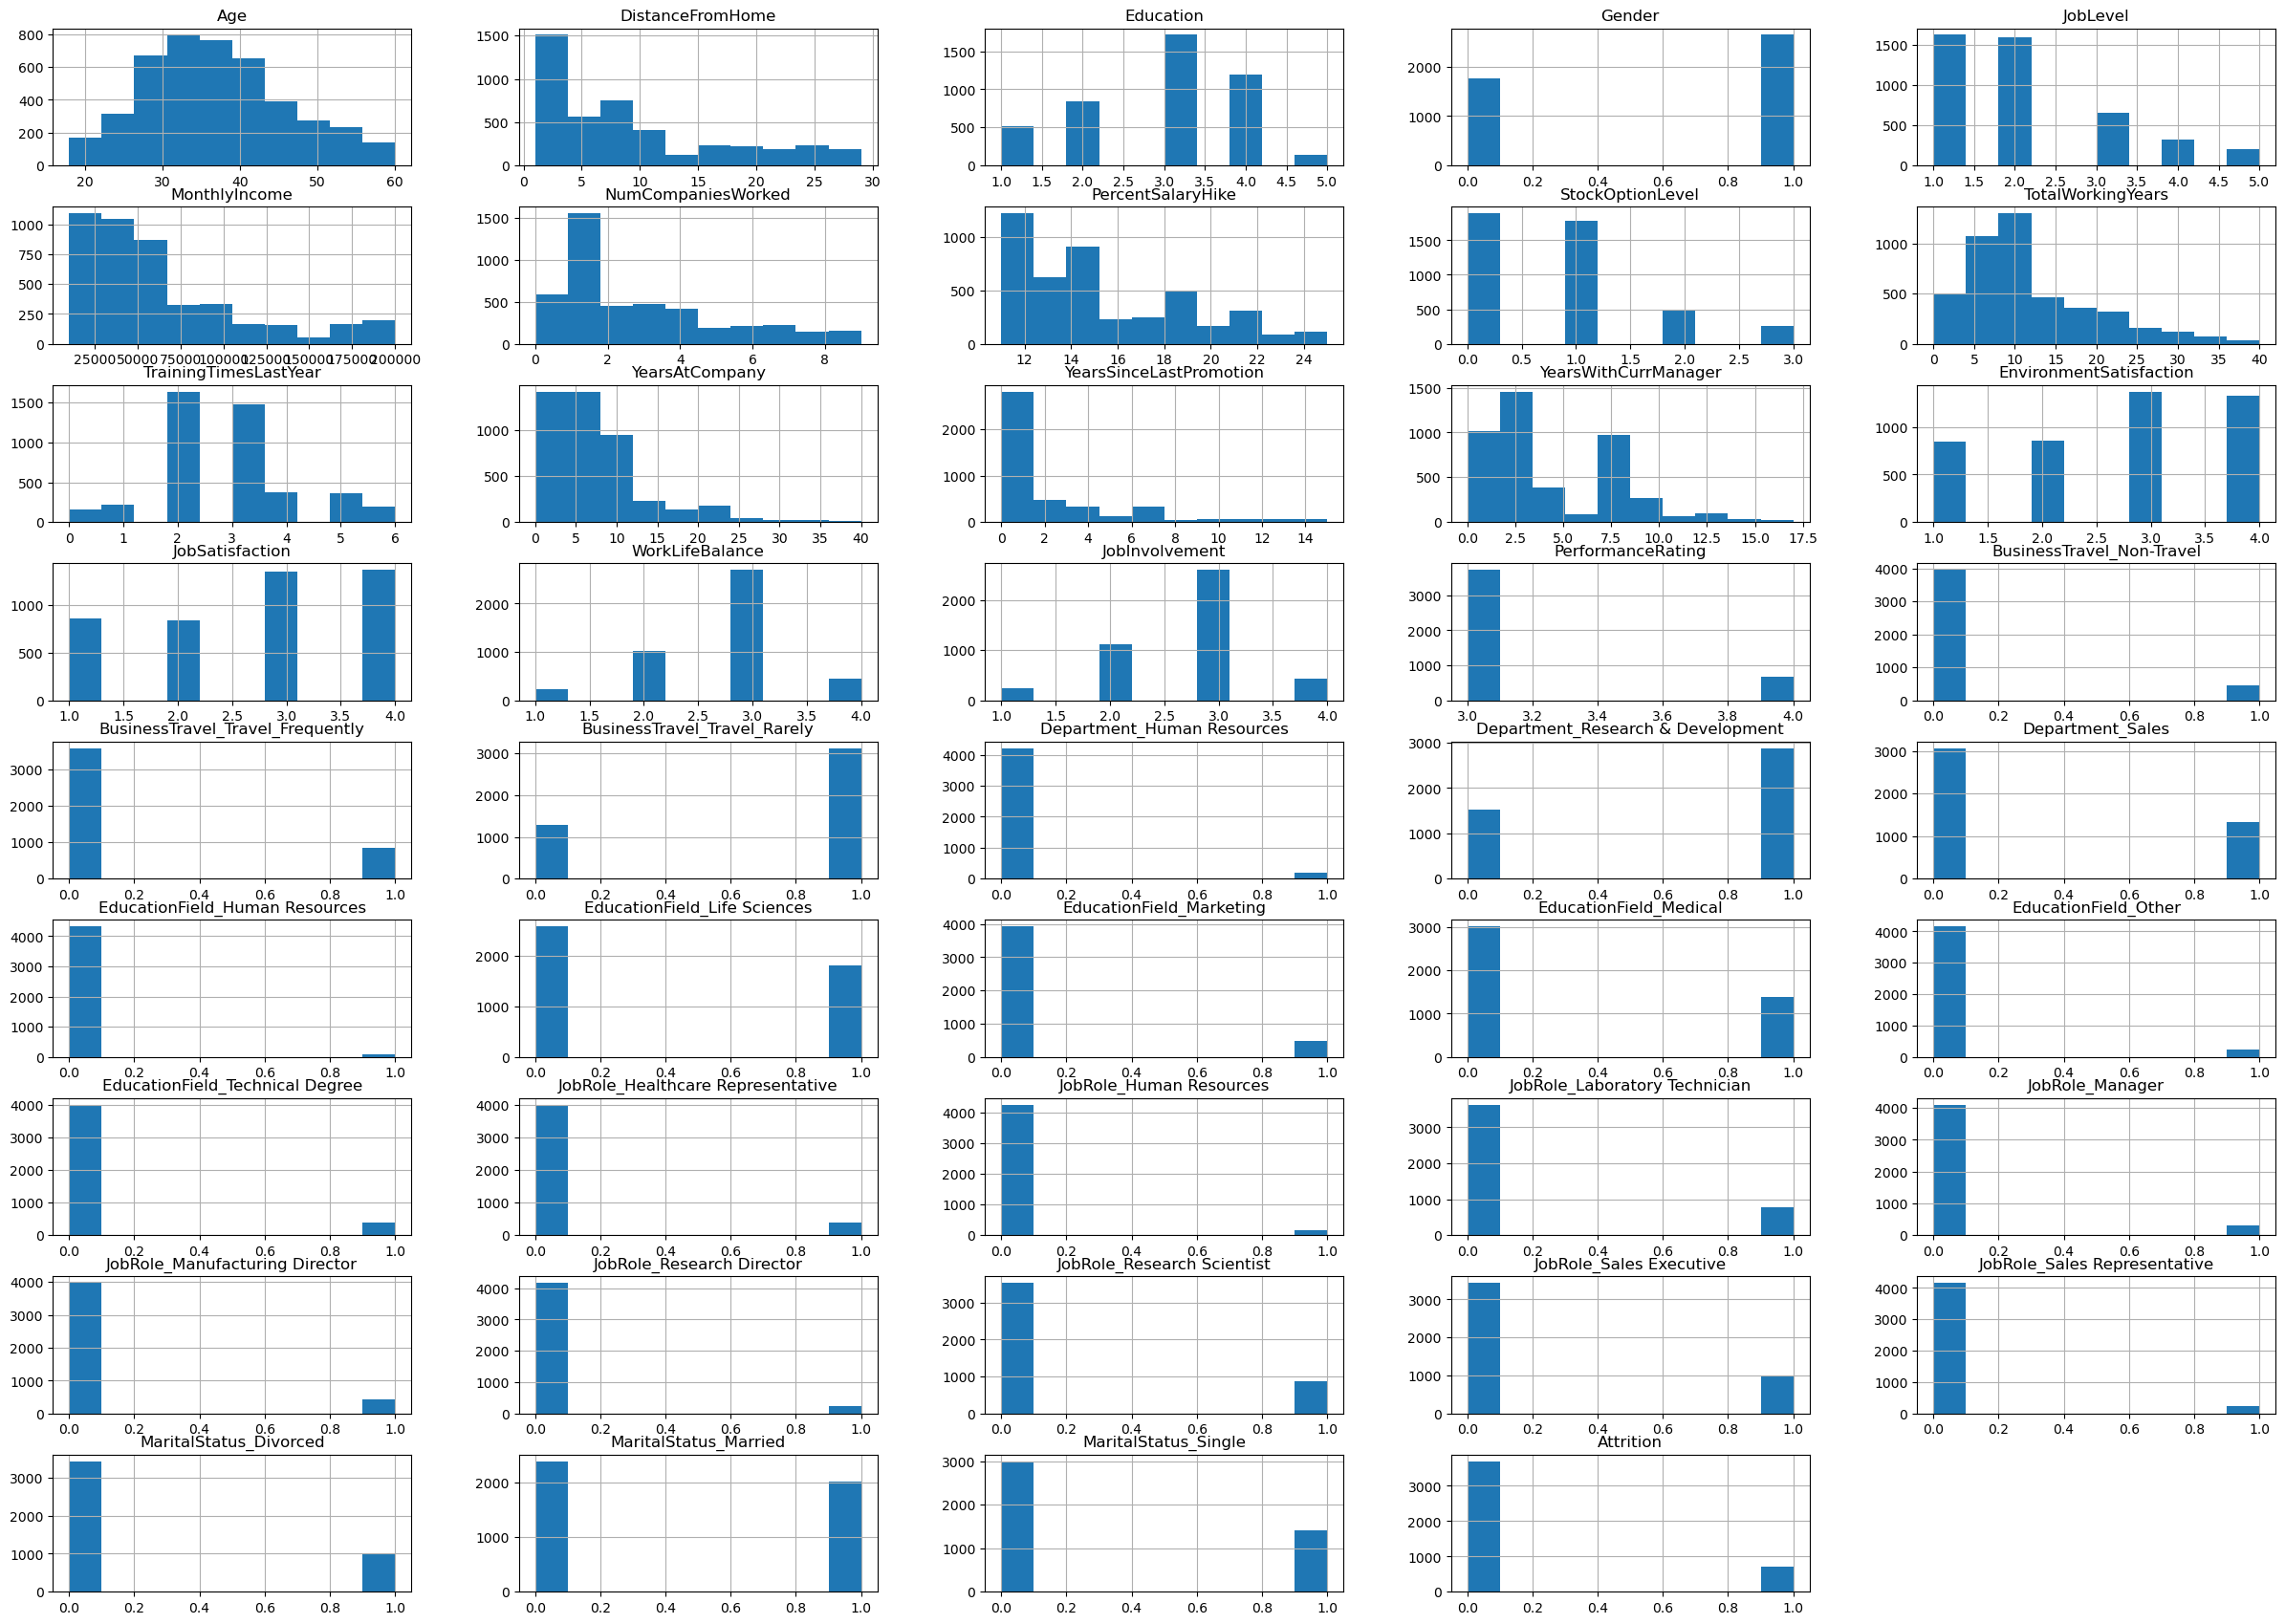

In [97]:
data.hist(layout=(25,5),figsize=(30, 60))
plt.show()

In [98]:
data.skew()      # considering range from -0.80 to 0.80

Age                                  0.413005
DistanceFromHome                     0.957466
Education                           -0.289484
Gender                              -0.408387
JobLevel                             1.024703
MonthlyIncome                        1.368884
NumCompaniesWorked                   1.031980
PercentSalaryHike                    0.820569
StockOptionLevel                     0.968321
TotalWorkingYears                    1.116832
TrainingTimesLastYear                0.552748
YearsAtCompany                       1.763328
YearsSinceLastPromotion              1.982939
YearsWithCurrManager                 0.832884
EnvironmentSatisfaction             -0.328260
JobSatisfaction                     -0.332530
WorkLifeBalance                     -0.567064
JobInvolvement                      -0.498080
PerformanceRating                    1.920574
BusinessTravel_Non-Travel            2.630274
BusinessTravel_Travel_Frequently     1.593981
BusinessTravel_Travel_Rarely      

In [99]:
data.kurt()

Age                                  -0.405951
DistanceFromHome                     -0.227045
Education                            -0.560569
Gender                               -1.834052
JobLevel                              0.395525
MonthlyIncome                         1.000232
NumCompaniesWorked                    0.023267
PercentSalaryHike                    -0.302638
StockOptionLevel                      0.361086
TotalWorkingYears                     0.912936
TrainingTimesLastYear                 0.491149
YearsAtCompany                        3.923864
YearsSinceLastPromotion               3.601761
YearsWithCurrManager                  0.167949
EnvironmentSatisfaction              -1.190517
JobSatisfaction                      -1.210799
WorkLifeBalance                       0.453455
JobInvolvement                        0.267663
PerformanceRating                     1.689372
BusinessTravel_Non-Travel             4.920574
BusinessTravel_Travel_Frequently      0.541020
BusinessTrave

# Plotting Boxplot to Check Outliers 

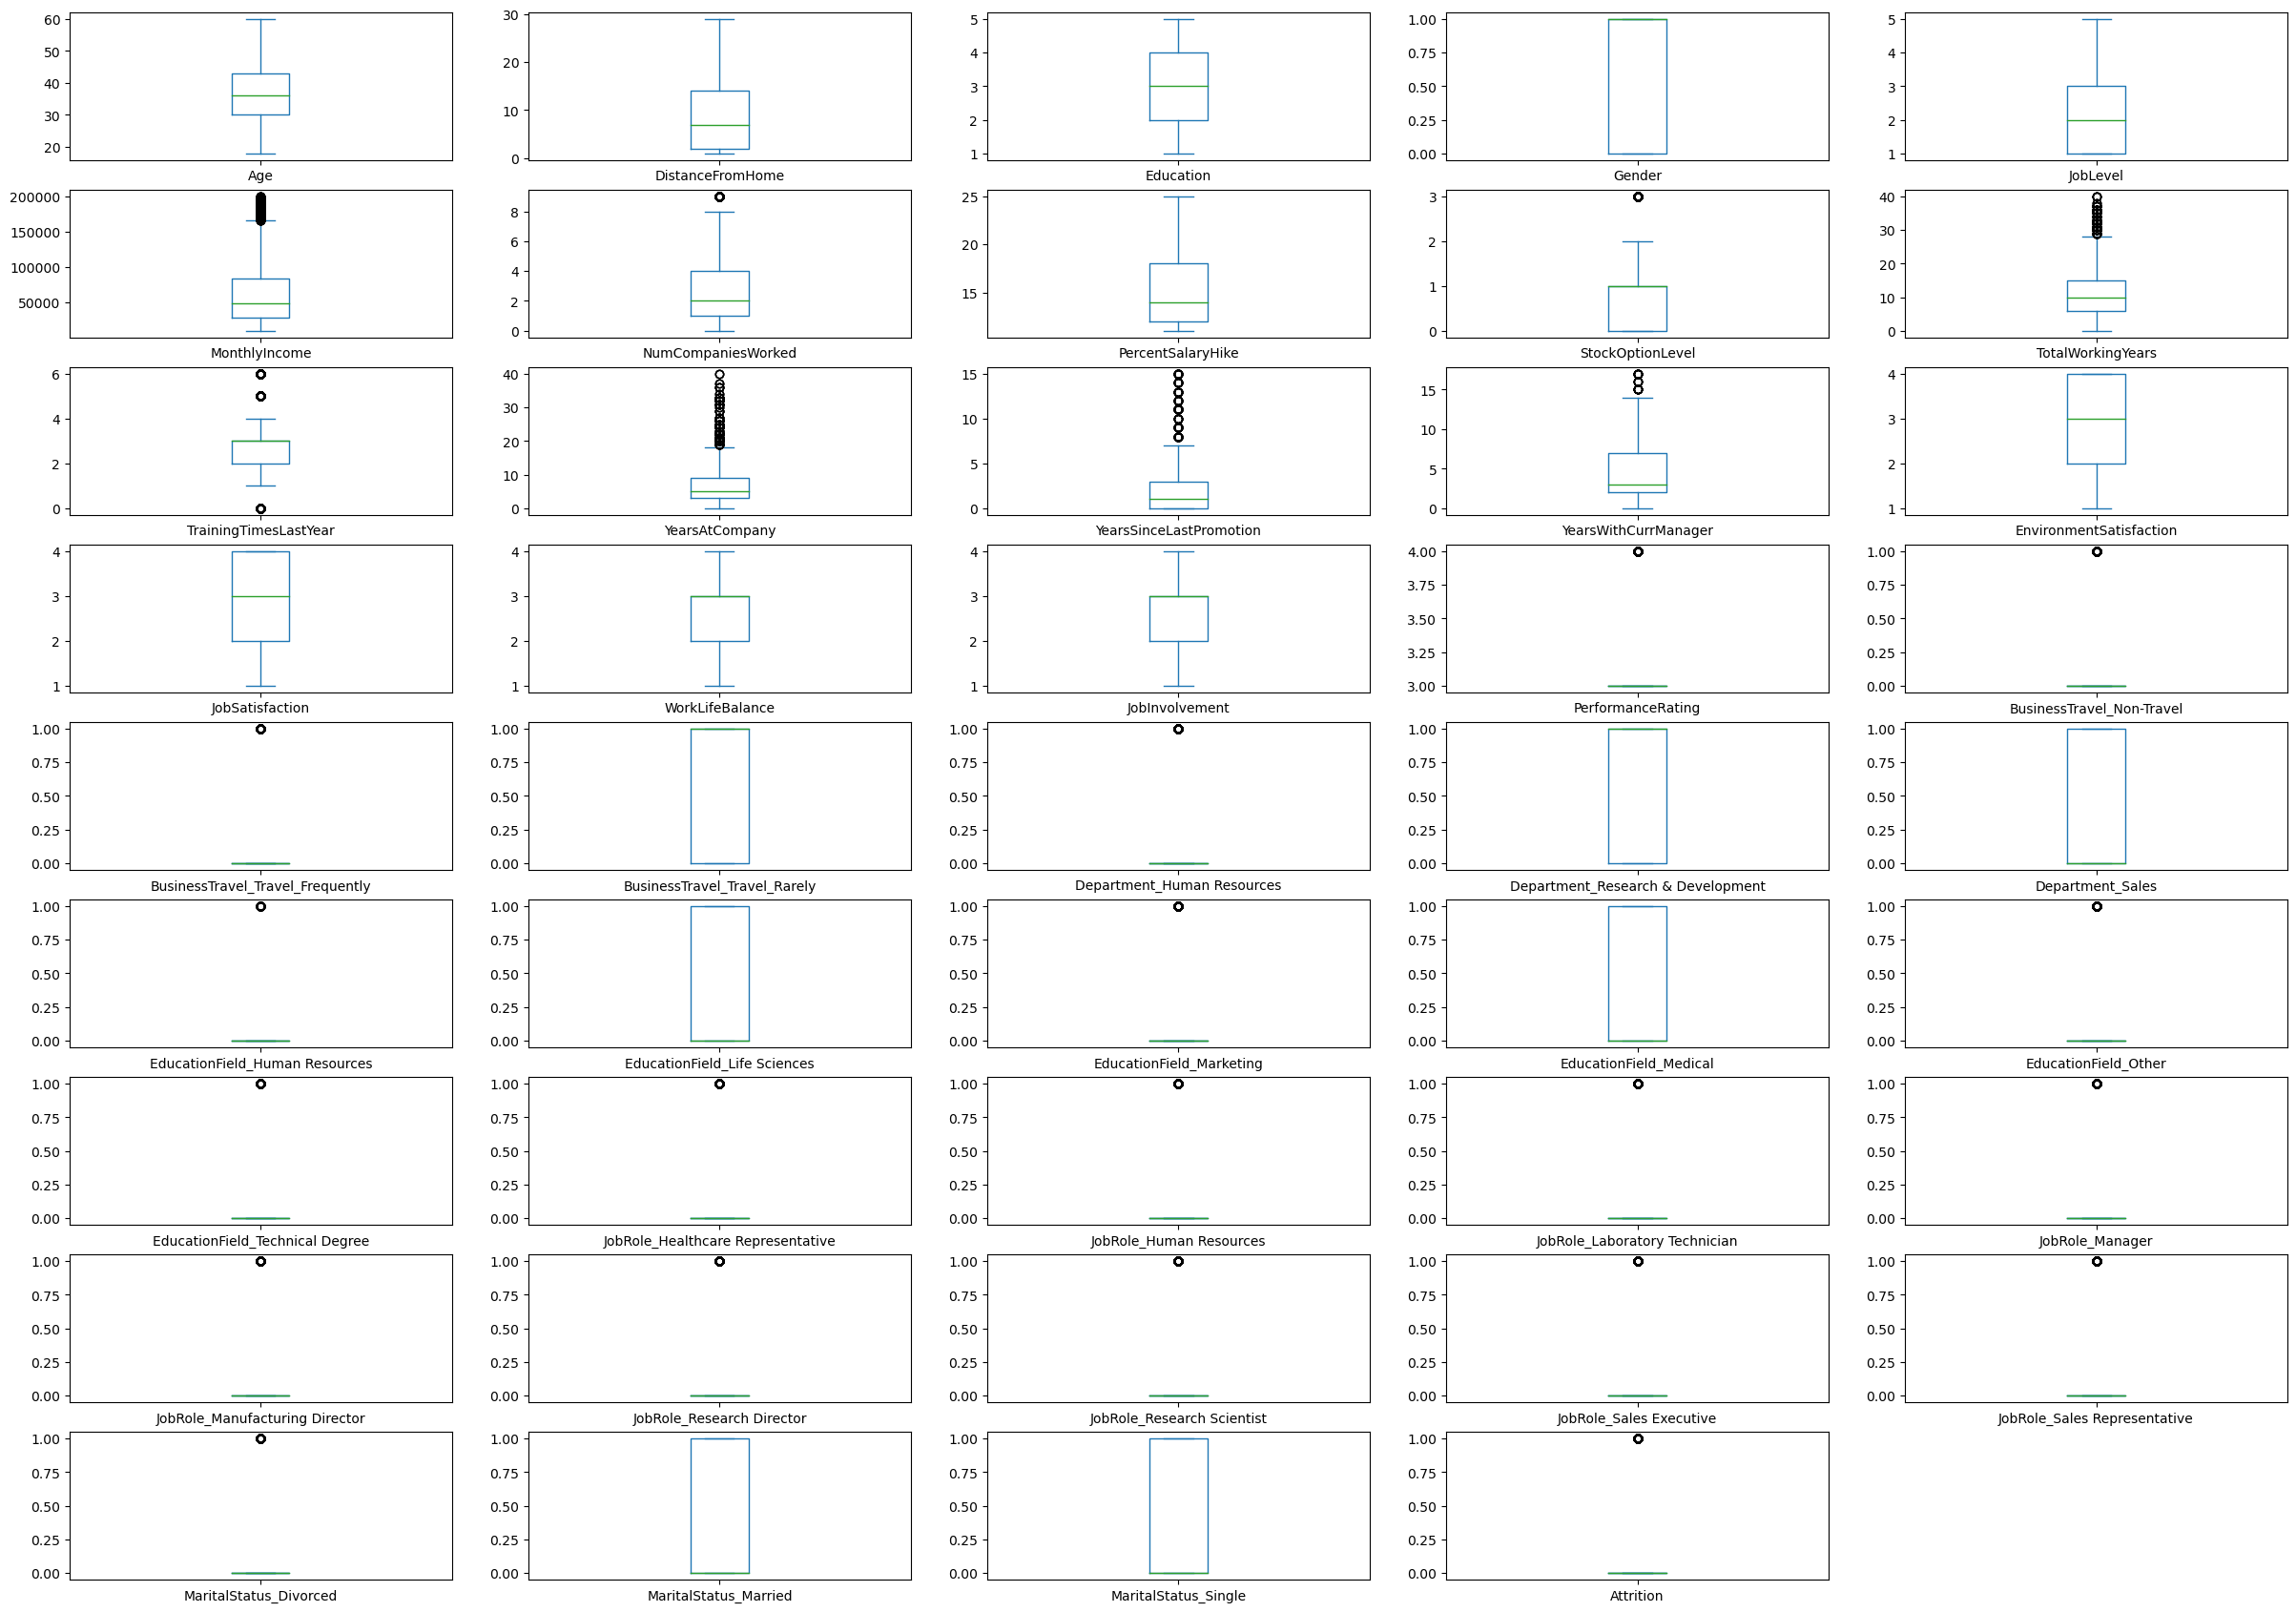

In [100]:
data.plot(kind='box', subplots=True, layout=(25,5), sharex=False, sharey=False,figsize=(30, 60))
plt.show()

In [ ]:
# from the Above Analysis We can say that 
# there are outliers in some of the Attributes 
# 1) MonthlyIncome 2)NumComapniesWorked 3) TotalWorkingYears 4) TrainingTimesLastYear 5)YearsAtCompany
# 6)YearsSinceLastPromotion 7)YearsWithCurrManager

# Removing Outlier by Z-score Method 

In [119]:
z1 = stats.zscore(data['MonthlyIncome'])                          
z2 = stats.zscore(data['NumCompaniesWorked'])
z3 = stats.zscore(data['TotalWorkingYears'])
z4 = stats.zscore(data['TrainingTimesLastYear'])
z5 = stats.zscore(data['YearsAtCompany'])
z6 = stats.zscore(data['YearsSinceLastPromotion'])
z7 = stats.zscore(data['YearsWithCurrManager'])

In [120]:
# We insert the computed Z-Score into the DataFrame-data
data.insert(0,'Z_Score_MonthlyIncome',list(z1),True)
data.insert(0,'Z_Score_NumCompaniesWorked',list(z2),True)
data.insert(0,'Z_Score_TotalWorkingYears',list(z3),True)
data.insert(0,'Z_Score_TrainingTimesLastYear',list(z4),True)
data.insert(0,'Z_Score_YearsAtCompany',list(z5),True)
data.insert(0,'Z_Score_YearsSinceLastPromotion',list(z6),True)
data.insert(0,'Z_Score_YearsWithCurrentManager',list(z7),True)

In [121]:
data.head()

,Z_Score_YearsWithCurrentManager,Z_Score_YearsSinceLastPromotion,Z_Score_YearsAtCompany,Z_Score_TrainingTimesLastYear,Z_Score_TotalWorkingYears,Z_Score_NumCompaniesWorked,Z_Score_MonthlyIncome,Age,DistanceFromHome,Education,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,-1.224432,-0.746791,-1.187258,0.232250,-1.322079,-0.602913,2.596437,51,6,2,...,0,0,0,0,0,0,0,1,0,0
1,0.079854,-0.260401,-0.198437,0.232250,-0.678877,-1.115808,-0.374590,31,10,1,...,0,0,0,1,0,0,0,0,1,1
2,-0.246217,-0.746791,-0.198437,-0.808625,-0.807517,-0.602913,-0.237471,32,17,4,...,0,0,0,0,1,0,0,1,0,0
3,0.405926,2.657941,0.543179,2.314000,0.221606,0.422877,1.000596,38,2,5,...,0,0,0,0,0,0,0,1,0,0
4,0.079854,-0.746791,0.048768,-0.808625,-0.292956,0.935772,-0.989297,32,10,1,...,0,0,0,0,1,0,0,0,1,0


In [122]:
print(data.shape)

(4410, 51)


In [123]:
# We will filter out the extreme Z-Scores from the required columns
# After the filtering has been successfully done we will enter NaN values into the respective columns

In [124]:
data.loc[data['Z_Score_MonthlyIncome'] > 1.96,'MonthlyIncome'] = np.nan
data.loc[data['Z_Score_MonthlyIncome'] < -1.96,'MonthlyIncome'] = np.nan

data.loc[data['Z_Score_NumCompaniesWorked'] > 1.96, 'NumCompaniesWorked'] = np.nan
data.loc[data['Z_Score_NumCompaniesWorked'] < -1.96, 'NumCompaniesWorked'] = np.nan

data.loc[data['Z_Score_TotalWorkingYears'] > 1.96, 'TotalWorkingYears'] = np.nan
data.loc[data['Z_Score_TotalWorkingYears'] < -1.96, 'TotalWorkingYears'] = np.nan

data.loc[data['Z_Score_TrainingTimesLastYear'] > 1.96, 'TrainingTimesLastYear'] = np.nan
data.loc[data['Z_Score_TrainingTimesLastYear'] < -1.96, 'TrainingTimesLastYear'] = np.nan

data.loc[data['Z_Score_YearsAtCompany'] > 1.96, 'YearsAtCompany'] = np.nan
data.loc[data['Z_Score_YearsAtCompany'] < -1.96, 'YearsAtCompany'] = np.nan

data.loc[data['Z_Score_YearsSinceLastPromotion'] > 1.96, 'YearsSinceLastPromotion'] = np.nan
data.loc[data['Z_Score_YearsSinceLastPromotion'] < -1.96, 'YearsSinceLastPromotion'] = np.nan

data.loc[data['Z_Score_YearsWithCurrentManager'] > 1.96, 'YearsWithCurrManager'] = np.nan
data.loc[data['Z_Score_YearsWithCurrentManager'] < -1.96, 'YearsWithCurrManager'] = np.nan


In [126]:
data.drop(columns=['Z_Score_MonthlyIncome','Z_Score_NumCompaniesWorked','Z_Score_TotalWorkingYears',
                   'Z_Score_TrainingTimesLastYear','Z_Score_YearsAtCompany','Z_Score_YearsSinceLastPromotion',
                 'Z_Score_YearsWithCurrentManager'], inplace=True)

In [127]:
# Checking for null values inside the filtered dataset
print(data.isnull().sum())

Age                                    0
DistanceFromHome                       0
Education                              0
Gender                                 0
JobLevel                               0
MonthlyIncome                        249
NumCompaniesWorked                   430
PercentSalaryHike                      0
StockOptionLevel                       0
TotalWorkingYears                    252
TrainingTimesLastYear                357
YearsAtCompany                       249
YearsSinceLastPromotion              378
YearsWithCurrManager                 147
EnvironmentSatisfaction                0
JobSatisfaction                        0
WorkLifeBalance                        0
JobInvolvement                         0
PerformanceRating                      0
BusinessTravel_Non-Travel              0
BusinessTravel_Travel_Frequently       0
BusinessTravel_Travel_Rarely           0
Department_Human Resources             0
Department_Research & Development      0
Department_Sales

In [128]:
# Based on the presence of empty values i.e null-values in our dataset we will proceed with the following steps
print(data['MonthlyIncome'].median())
print(data['NumCompaniesWorked'].median())
print(data['TotalWorkingYears'].median())
print(data['TrainingTimesLastYear'].median())
print(data['YearsAtCompany'].median())
print(data['YearsSinceLastPromotion'].median())
print(data['YearsWithCurrManager'].median())

46010.0
1.0
9.0
3.0
5.0
1.0
3.0


In [129]:
# We will replace the null-values present within the dataset with the median values of the observation of the respective columns
data['MonthlyIncome'].replace(np.nan,data['MonthlyIncome'].median(),inplace=True)
data['NumCompaniesWorked'].replace(np.nan,data['NumCompaniesWorked'].median(),inplace=True)
data['TotalWorkingYears'].replace(np.nan,data['TotalWorkingYears'].median(),inplace=True)
data['YearsAtCompany'].replace(np.nan,data['YearsAtCompany'].median(),inplace=True)
data['YearsSinceLastPromotion'].replace(np.nan,data['YearsSinceLastPromotion'].median(),inplace=True)
data['YearsWithCurrManager'].replace(np.nan,data['YearsWithCurrManager'].median(),inplace=True)
data['TrainingTimesLastYear'].replace(np.nan,data['TrainingTimesLastYear'].median(),inplace=True)

In [130]:
# Checking for null values
print(data.isnull().sum())

Age                                  0
DistanceFromHome                     0
Education                            0
Gender                               0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
EnvironmentSatisfaction              0
JobSatisfaction                      0
WorkLifeBalance                      0
JobInvolvement                       0
PerformanceRating                    0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
EducationField_Human Reso

In [131]:
# Therefore, curated dataset does not contain any null-values inside it
print(data.shape)

(4410, 44)


In [132]:
print(data.dtypes)

Age                                    int64
DistanceFromHome                       int64
Education                              int64
Gender                                 int64
JobLevel                               int64
MonthlyIncome                        float64
NumCompaniesWorked                   float64
PercentSalaryHike                      int64
StockOptionLevel                       int64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
YearsAtCompany                       float64
YearsSinceLastPromotion              float64
YearsWithCurrManager                 float64
EnvironmentSatisfaction                int64
JobSatisfaction                        int64
WorkLifeBalance                        int64
JobInvolvement                         int64
PerformanceRating                      int64
BusinessTravel_Non-Travel              int64
BusinessTravel_Travel_Frequently       int64
BusinessTravel_Travel_Rarely           int64
Department

In [133]:
# Re-formatting Features  ( changing the datatype according to the requriements):
data['MonthlyIncome'] = data['MonthlyIncome'].astype('int64')
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].astype('int64')
data['TotalWorkingYears'] = data['TotalWorkingYears'].astype('int64')
data['TrainingTimesLastYear'] = data['TrainingTimesLastYear'].astype('int64')
data['YearsAtCompany'] = data['YearsAtCompany'].astype('int64')                       
data['YearsSinceLastPromotion'] = data['YearsSinceLastPromotion'].astype('int64')                   
data['YearsWithCurrManager'] = data['YearsWithCurrManager'].astype('int64')           
                

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                4410 non-null   int64
 1   DistanceFromHome                   4410 non-null   int64
 2   Education                          4410 non-null   int64
 3   Gender                             4410 non-null   int64
 4   JobLevel                           4410 non-null   int64
 5   MonthlyIncome                      4410 non-null   int64
 6   NumCompaniesWorked                 4410 non-null   int64
 7   PercentSalaryHike                  4410 non-null   int64
 8   StockOptionLevel                   4410 non-null   int64
 9   TotalWorkingYears                  4410 non-null   int64
 10  TrainingTimesLastYear              4410 non-null   int64
 11  YearsAtCompany                     4410 non-null   int64
 12  YearsSinceLastPromot

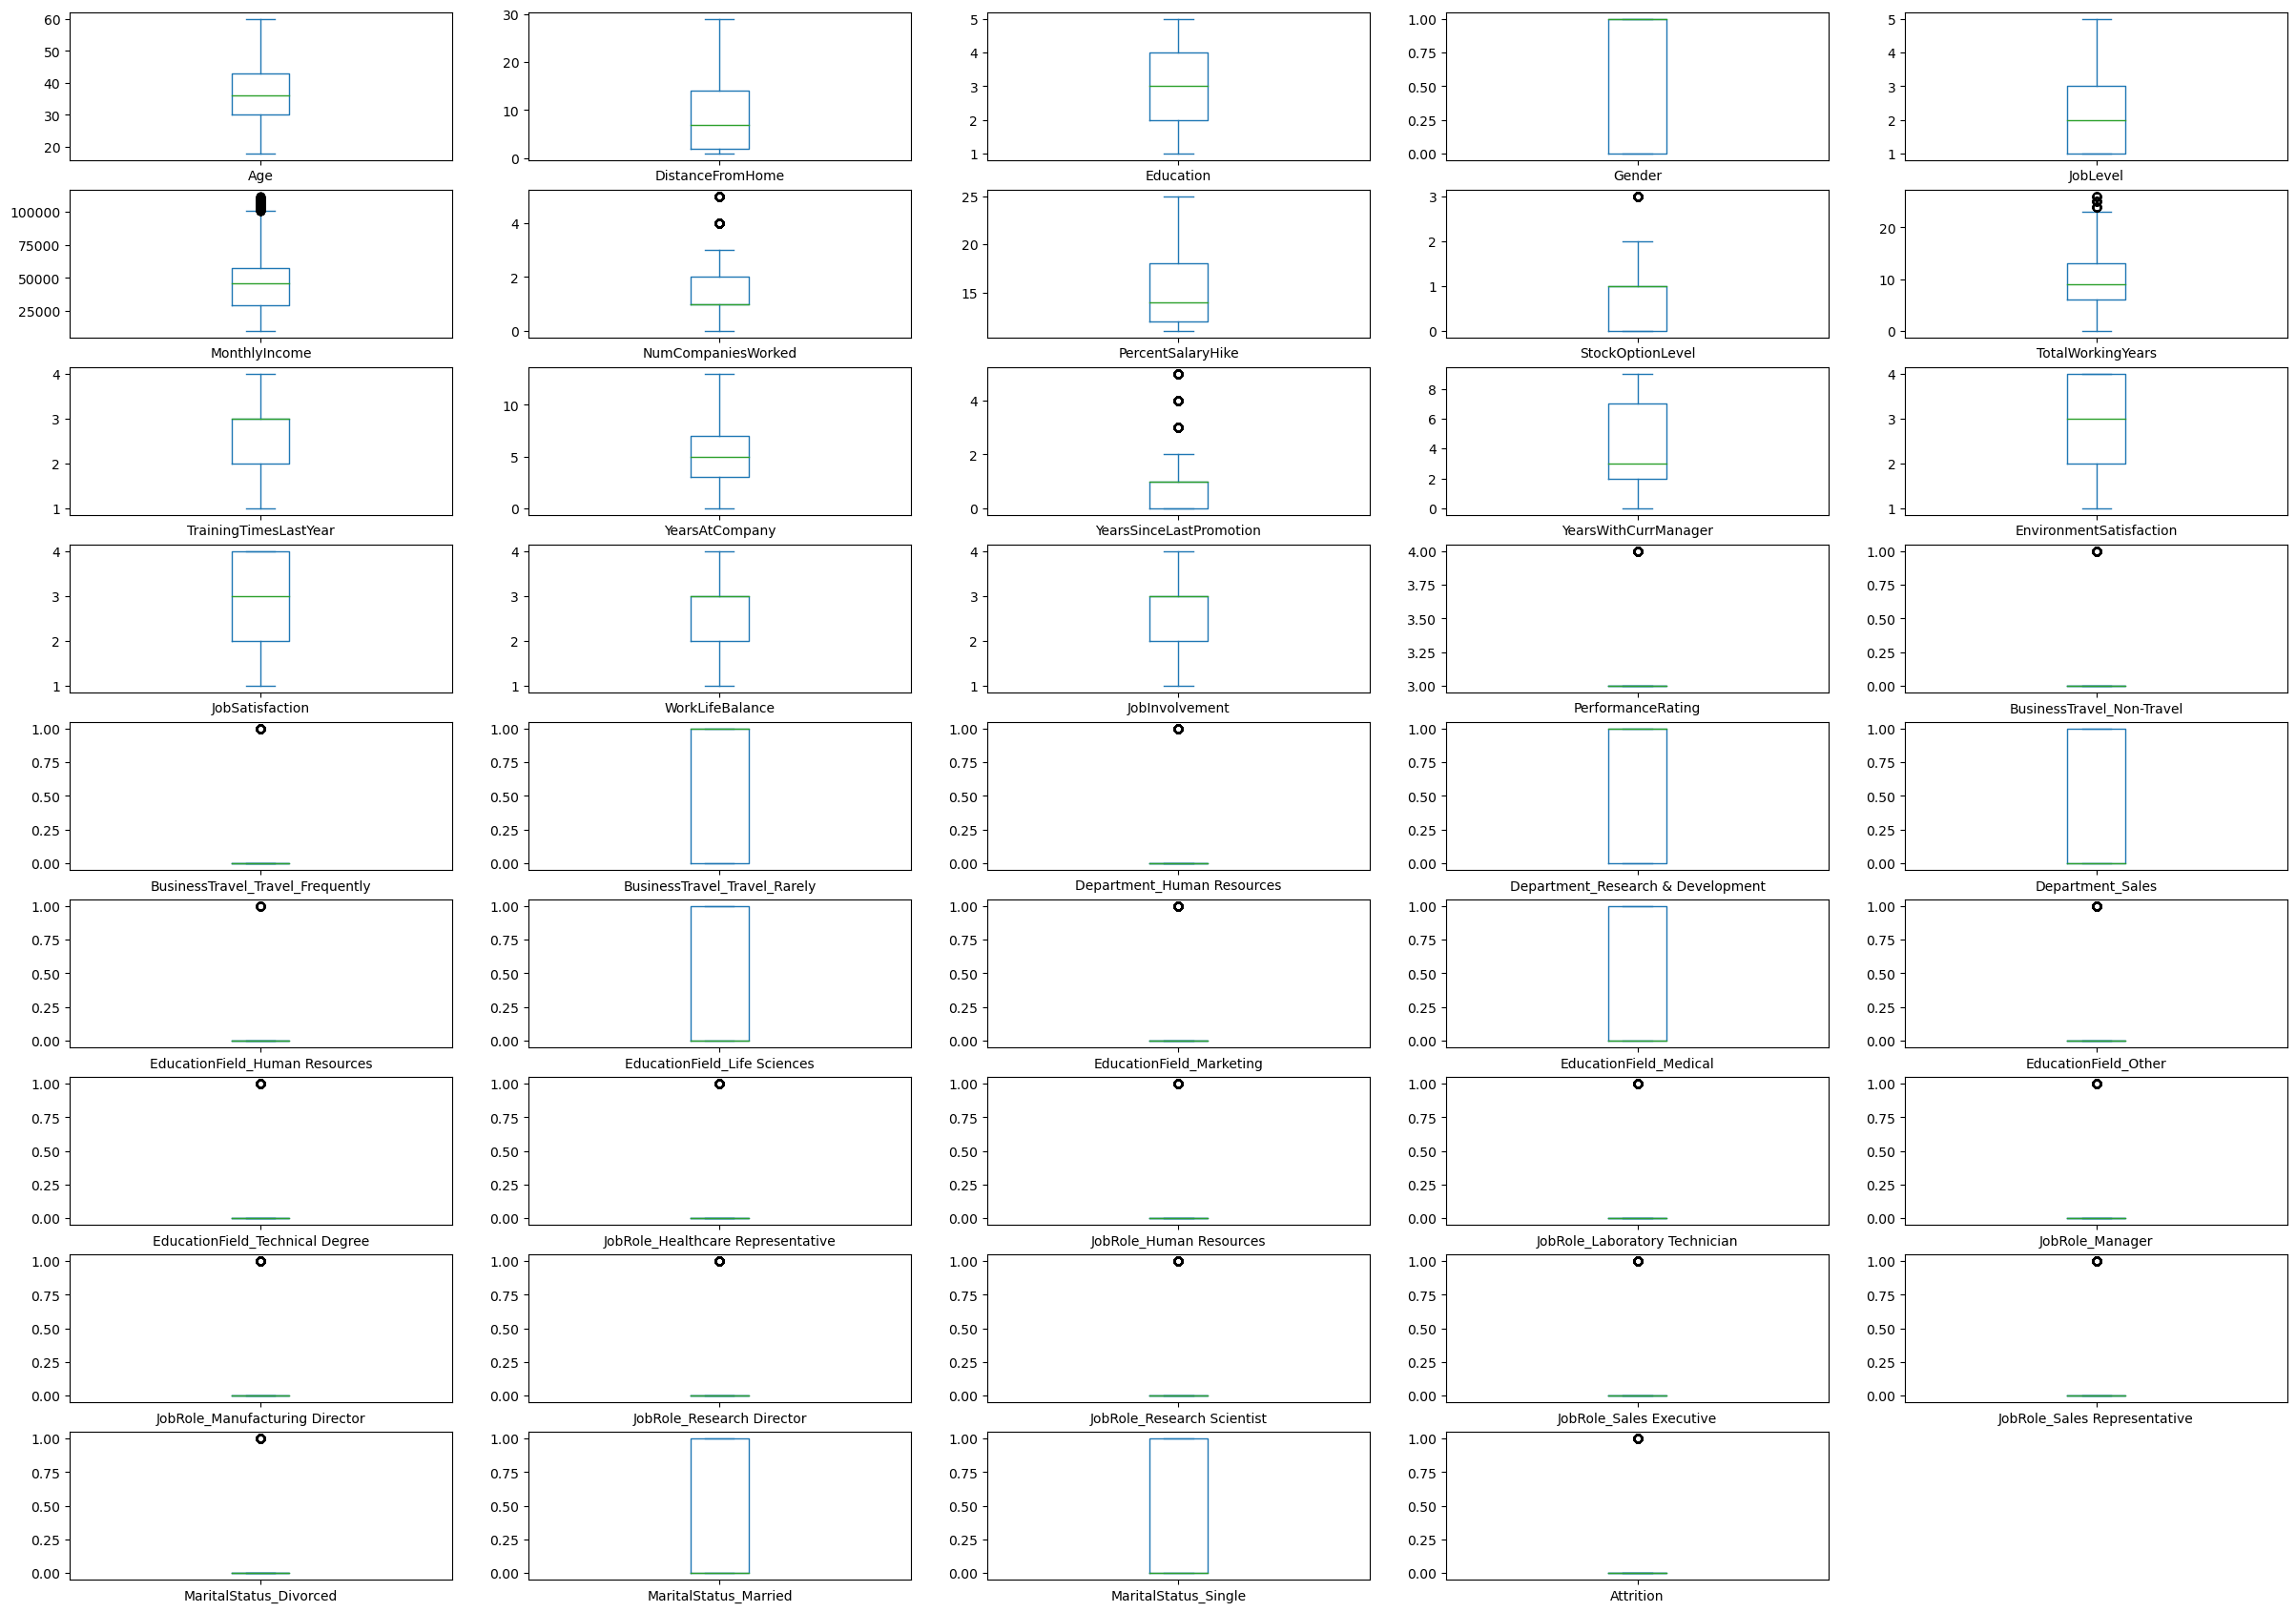

In [135]:
data.plot(kind='box', subplots=True, layout=(25,5), sharex=False, sharey=False,figsize=(30, 60))
plt.show()

In [136]:
# From the Above analysis outliers has been reduced 

# Exploratory Data Analysis (EDA) and Data Visualization

In [139]:
correlation=data.corr()
correlation

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
Age,1.000000,0.006963,-0.035706,-3.935163e-02,-0.002884,-0.046964,0.273985,-0.033137,-0.031753,0.517056,...,0.009020,0.001261,-1.605906e-02,0.005834,0.008219,-0.014096,0.033120,0.083919,-0.119185,-0.159205
DistanceFromHome,0.006963,1.000000,-0.008638,-4.417279e-02,-0.037329,-0.031149,-0.025116,0.038125,0.011169,-0.001687,...,-0.038859,0.000305,-3.848864e-03,-0.002360,-0.012479,0.005463,0.001624,0.038151,-0.042204,-0.009730
Education,-0.035706,-0.008638,1.000000,-1.654683e-02,0.045746,-0.001176,0.010253,-0.040531,0.001261,-0.001475,...,0.044142,-0.011976,4.969407e-02,0.000709,-0.004180,0.032320,-0.016818,-0.008534,0.024114,-0.015111
Gender,-0.039352,-0.044173,-0.016547,1.000000e+00,-0.026854,0.027971,-0.047183,0.011841,0.019237,-0.038894,...,-0.044809,-0.004657,3.362595e-18,0.030628,-0.005348,-0.010829,0.029382,-0.035675,0.011910,0.018125
JobLevel,-0.002884,-0.037329,0.045746,-2.685434e-02,1.000000,0.012662,0.013678,0.010973,0.000993,-0.043912,...,0.025348,-0.004684,3.220675e-02,0.017455,-0.021969,-0.024790,0.014915,0.007360,-0.021163,-0.010290
MonthlyIncome,-0.046964,-0.031149,-0.001176,2.797147e-02,0.012662,1.000000,-0.060194,-0.010748,0.021851,-0.003543,...,0.002450,0.046910,3.745362e-02,-0.024052,0.004949,-0.056087,0.042795,-0.005159,-0.032651,-0.007681
NumCompaniesWorked,0.273985,-0.025116,0.010253,-4.718277e-02,0.013678,-0.060194,1.000000,-0.037442,0.017656,0.214211,...,-0.001415,0.015154,2.989974e-02,-0.021087,0.008737,-0.002039,0.054466,0.033247,-0.084088,-0.018628
PercentSalaryHike,-0.033137,0.038125,-0.040531,1.184147e-02,0.010973,-0.010748,-0.037442,1.000000,0.012548,-0.044874,...,-0.003199,-0.017697,-9.640495e-03,-0.009871,-0.041760,0.066547,0.003794,-0.015678,0.013365,0.032533
StockOptionLevel,-0.031753,0.011169,0.001261,1.923659e-02,0.000993,0.021851,0.017656,0.012548,1.000000,0.007141,...,-0.081638,0.031840,-2.996103e-02,0.026398,0.040747,-0.030767,0.010374,-0.038920,0.032327,-0.006839
TotalWorkingYears,0.517056,-0.001687,-0.001475,-3.889450e-02,-0.043912,-0.003543,0.214211,-0.044874,0.007141,1.000000,...,-0.024682,0.012235,1.912675e-03,-0.021367,0.005557,-0.049486,0.047993,0.039500,-0.084996,-0.175399


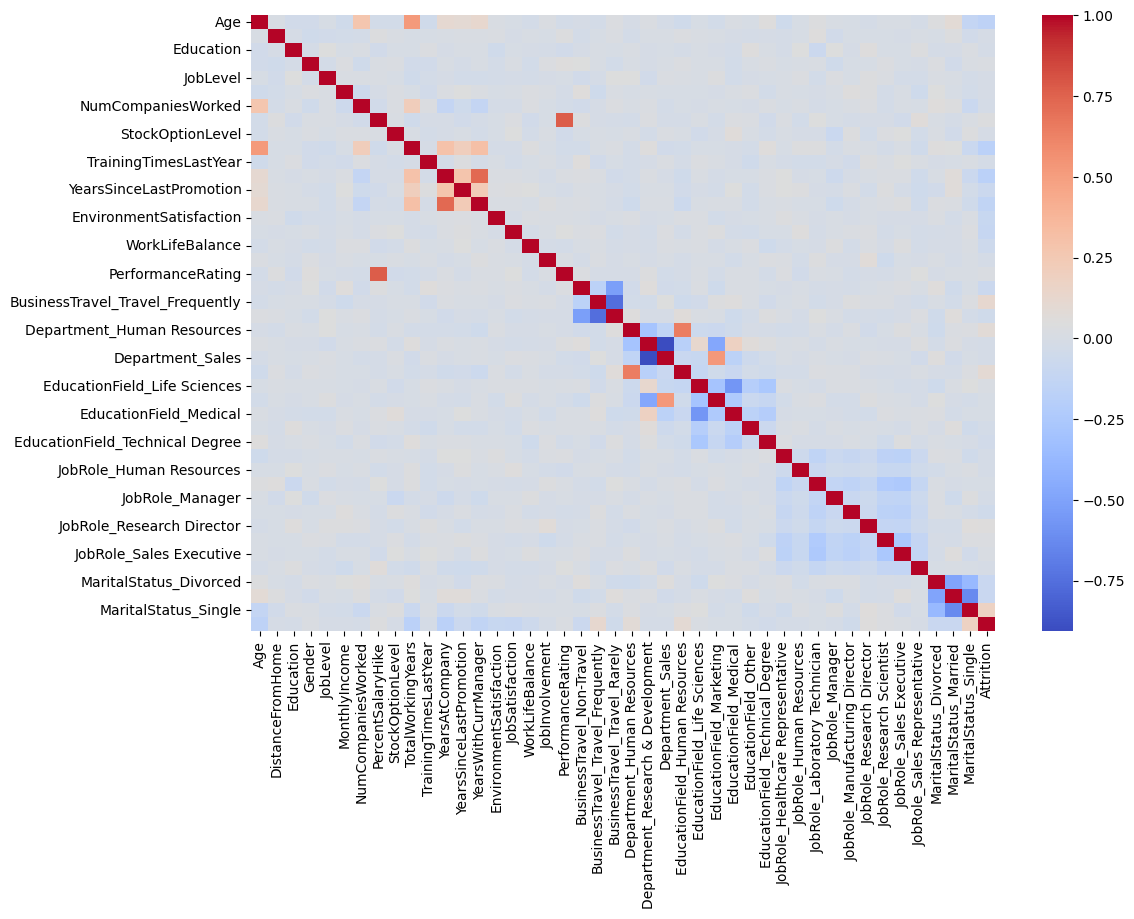

In [144]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation, cmap= 'coolwarm')
plt.show()

# data  Visualization

In [297]:
dataset['Attrition'].value_counts(normalize=True).to_frame()

,proportion
Attrition,
No,0.838776
Yes,0.161224


<Axes: ylabel='proportion'>

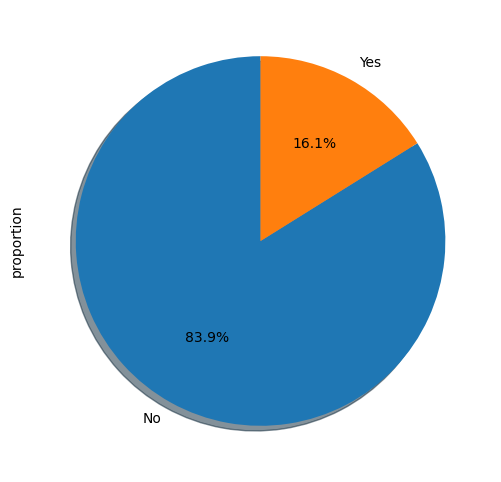

In [149]:
dataset['Attrition'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='pie',figsize=(10,6),
                                                                                autopct='%1.1f%%',startangle=90,shadow=True)

In [151]:
#from the above analysis there are only 16% Attrition  

<Axes: xlabel='Attrition', ylabel='count'>

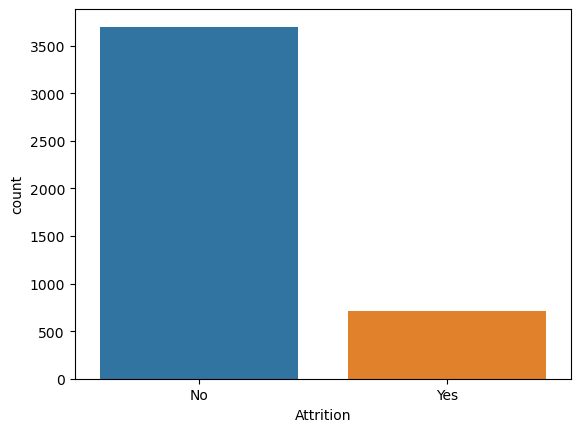

In [160]:
sns.countplot(data=dataset,x="Attrition")

# How is Attrition affected by Gender?

<Axes: ylabel='proportion'>

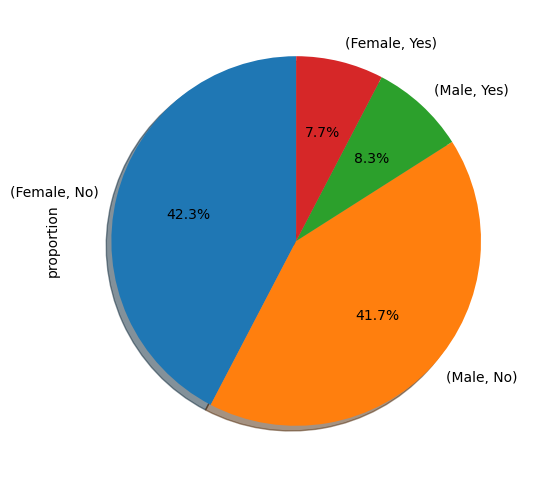

In [167]:
dataset.groupby(['Gender'])['Attrition'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='pie',
                        figsize=(10,6), autopct='%1.1f%%',startangle=90,shadow=True)

In [ ]:
# from the above analysis
# Out of the total Female Population 42.3% are not affceted to Attrition 
# Out of the total male Population 41.7% are not affceted to Attrition 
# 7.7% of female population is affected to Attrition
# 8.3% of male population affected to Attrition

# Attrition is Affected by Business Travel?

In [296]:
dataset['BusinessTravel'].value_counts().to_frame()

,count
BusinessTravel,
Travel_Rarely,3129
Travel_Frequently,831
Non-Travel,450


In [295]:
dataset.groupby(['BusinessTravel'])['Attrition'].value_counts().to_frame()

count
BusinessTravel    Attrition       
Non-Travel        No           414
                  Yes           36
Travel_Frequently No           624
                  Yes          207
Travel_Rarely     No          2661
                  Yes          468

<Axes: xlabel='BusinessTravel', ylabel='count'>

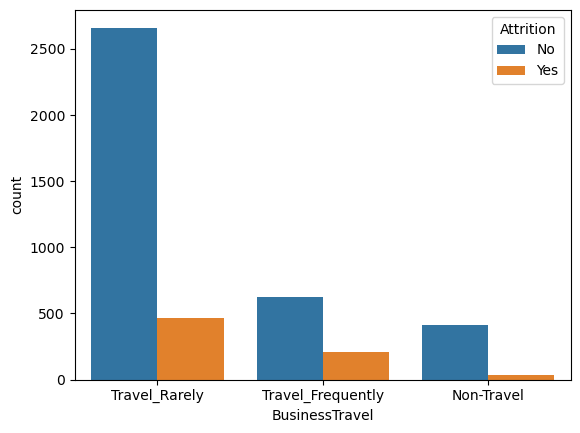

In [172]:
sns.countplot(data=dataset,x='BusinessTravel',hue='Attrition')

<Axes: ylabel='count'>

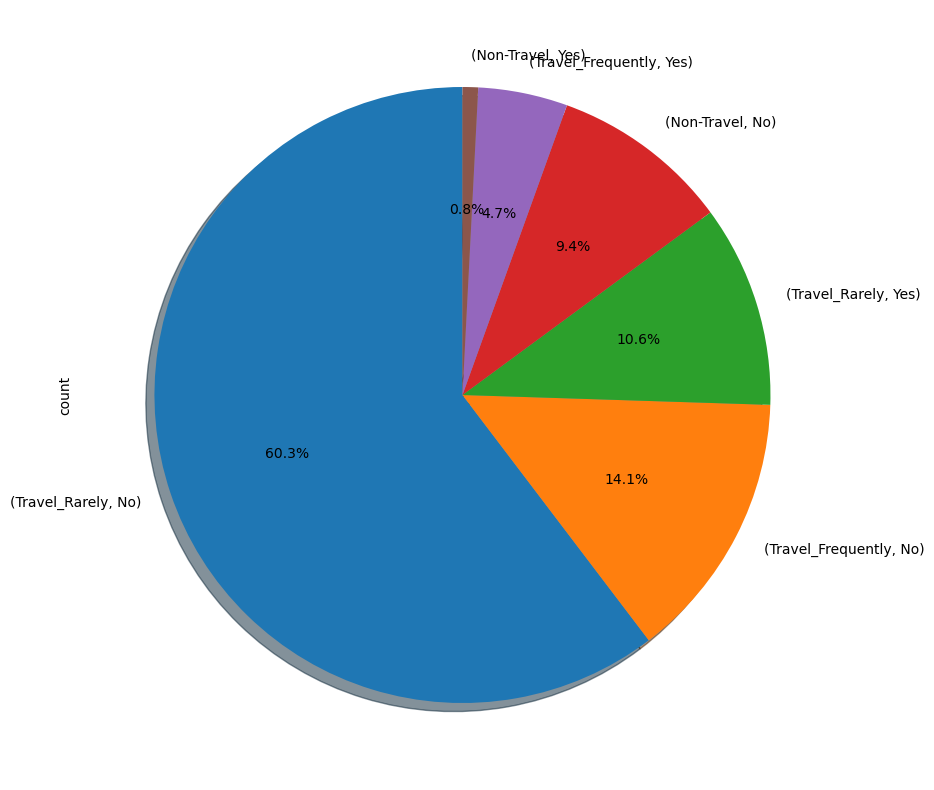

In [177]:
dataset.groupby(['BusinessTravel'])['Attrition'].value_counts().sort_values(ascending=False).plot(kind='pie',figsize=(10,10),
                                        autopct='%1.1f%%',startangle=90,shadow=True)

In [178]:
# from the Above analysis 
# 60.3% who travel rarely has no attrition 
# 14.1% who travel frequently has no attrition
# 10.6% who travel rarely  has attrition 
# 9.4%  non traveller  has no attrition 
# 0.8% non travller has attrition
# 4.7% who travel frequently has attrition

# What is effect of the Distance from home on Attrition ?

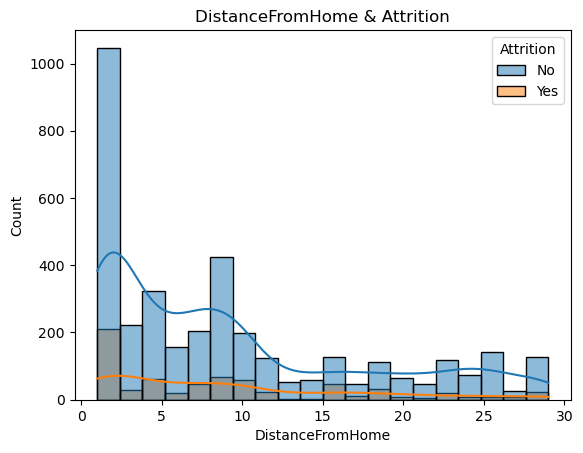

In [182]:
plt.plot(figsize=(10,6))                                  # graphs shows DistanceFrom Home and Attrition
sns.histplot(data=dataset,x='DistanceFromHome',hue='Attrition',kde=True)
plt.title('DistanceFromHome & Attrition')
plt.show()

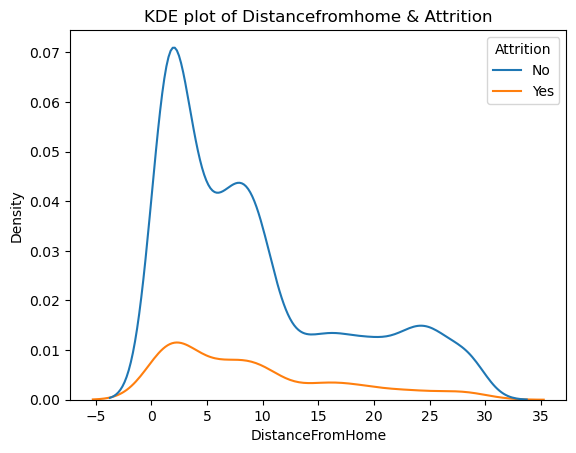

In [184]:
plt.plot(figsize=(10,6))
sns.kdeplot(data=dataset,x='DistanceFromHome',hue='Attrition')
plt.title('KDE plot of Distancefromhome & Attrition')
plt.show()

# Has attrition been affected by the department of work?

In [294]:
dataset.groupby(['Department'])['Attrition'].value_counts().to_frame()

count
Department             Attrition       
Human Resources        No           132
                       Yes           57
Research & Development No          2430
                       Yes          453
Sales                  No          1137
                       Yes          201

<Axes: xlabel='Department', ylabel='count'>

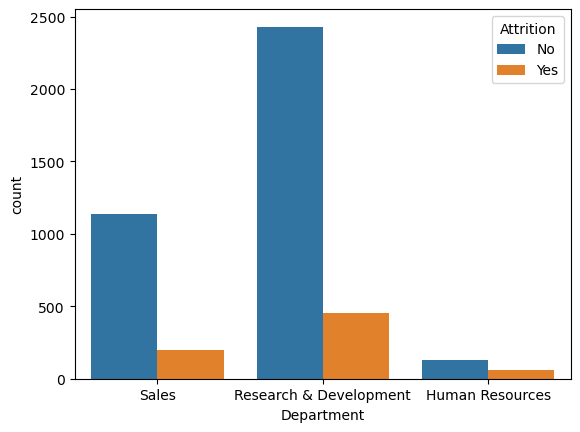

In [192]:
sns.countplot(data=dataset,x='Department',hue='Attrition')

<Axes: ylabel='count'>

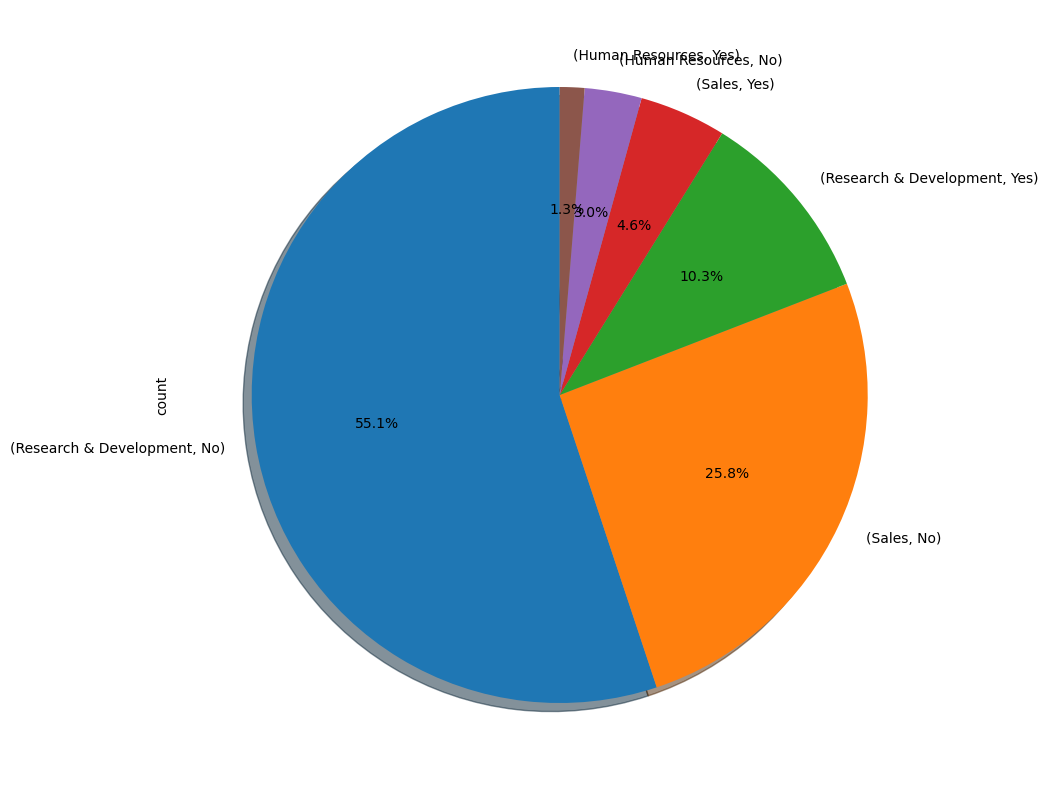

In [187]:
dataset.groupby(['Department'])['Attrition'].value_counts().sort_values(ascending=False).plot(kind='pie',figsize=(10,10),
                                                                    autopct='%1.1f%%',startangle=90,shadow=True)

In [ ]:
# From the above analysis 
# Research & Development has most number of Attrition around 453 
# sales has second most number of Attrition around 201
# and lastly Human Resource 57 attrtion in a department 


In [179]:
dataset.head()

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition
0,1,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,6,1,0,0,3.0,4.0,2.0,3,3,No
1,2,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,...,3,5,1,4,3.0,2.0,4.0,2,4,Yes
2,3,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,...,2,5,0,3,2.0,2.0,1.0,3,3,No
3,4,38,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,...,5,8,7,5,4.0,4.0,3.0,2,3,No
4,5,32,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,...,2,6,0,4,4.0,1.0,3.0,3,3,No


# What position sees the highest attrition rate?

In [293]:
dataset.groupby(['JobRole'])['Attrition'].value_counts().to_frame()

count
JobRole                   Attrition       
Healthcare Representative No           336
                          Yes           57
Human Resources           No           135
                          Yes           21
Laboratory Technician     No           651
                          Yes          126
Manager                   No           264
                          Yes           42
Manufacturing Director    No           387
                          Yes           48
Research Director         No           183
                          Yes           57
Research Scientist        No           717
                          Yes          159
Sales Executive           No           813
                          Yes          165
Sales Representative      No           213
                          Yes           36

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Sales Executive'),
  Text(3, 0, 'Human Resources'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Laboratory Technician'),
  Text(6, 0, 'Manufacturing Director'),
  Text(7, 0, 'Sales Representative'),
  Text(8, 0, 'Manager')])

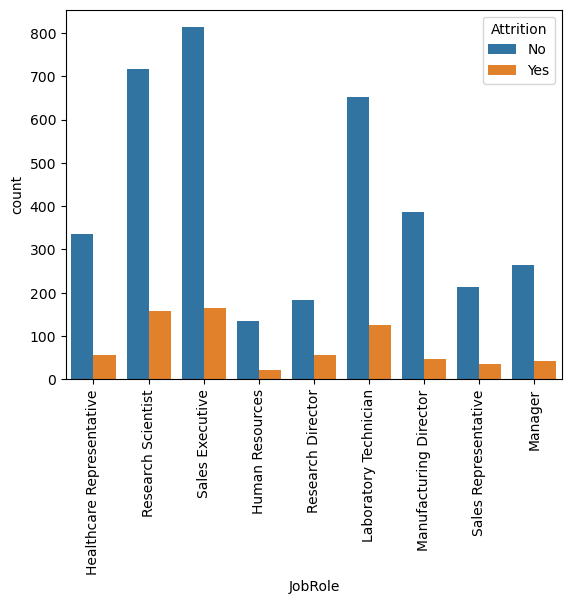

In [230]:
sns.countplot(data=dataset,x='JobRole',hue='Attrition')
plt.xticks(rotation=90)

In [ ]:
# from the above analysis its observe that 
# sales Executives has highest attrition among them
# Research scientist has 2nd most Attrition
# Laboratory Technician has 3rd most Attrition


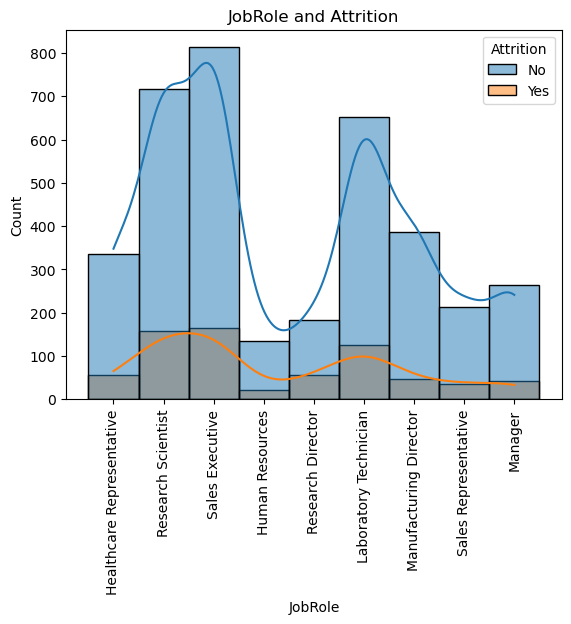

In [227]:
plt.plot(figsize=(10,6))
sns.histplot(data=dataset,x='JobRole',hue='Attrition',kde=True)
plt.xticks(rotation=90)
plt.title('JobRole and Attrition')
plt.show()

# Has attrition been affected by Education?

<Axes: xlabel='Education', ylabel='count'>

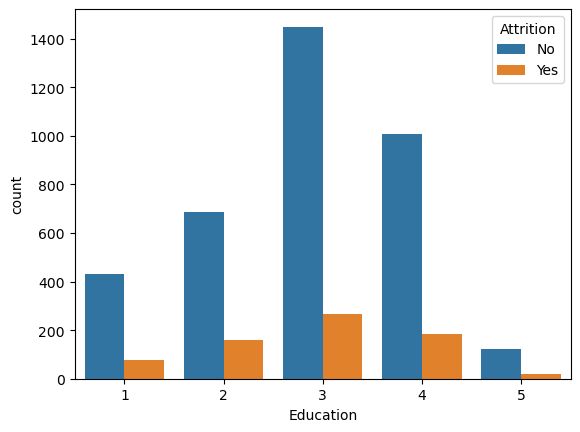

In [220]:
sns.countplot(data=dataset,x='Education',hue='Attrition')

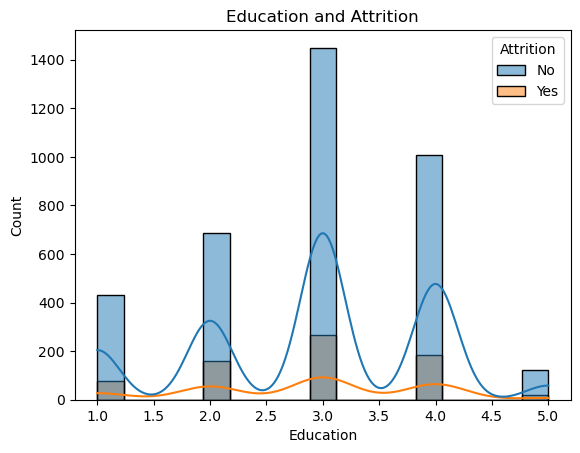

In [221]:
plt.plot(figsize=(10,6))
sns.histplot(data=dataset,x='Education',hue='Attrition',kde=True)
plt.title('Education and Attrition')
plt.show()

In [292]:
dataset.groupby(['Education'])['Attrition'].value_counts().to_frame()

count
Education Attrition       
1         No           432
          Yes           78
2         No           687
          Yes          159
3         No          1449
          Yes          267
4         No          1008
          Yes          186
5         No           123
          Yes           21

In [223]:
# from the analysis 
# At  level 3 there are more  Attrition
# At  level 4 second most number of Attrition 
# then at level 2
# and lastly at level one 

# what is effect of age on attrition ?

In [291]:
data.groupby(['Age'])['MonthlyIncome'].value_counts().to_frame()

count
Age MonthlyIncome       
18  23350              3
    109650             3
    46010              3
    38120              3
    34680              3
...                  ...
60  40250              3
    25640              3
    23390              3
    22690              3
    53290              3

[1294 rows x 1 columns]

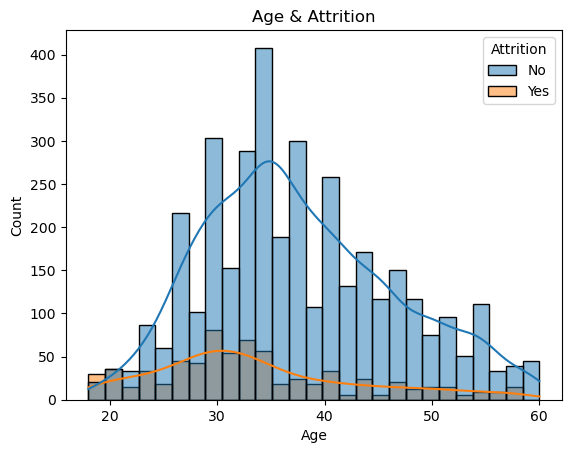

In [235]:
plt.plot(figsize=(10,6))
sns.histplot(data=dataset,x='Age',hue='Attrition',kde=True)
plt.title('Age & Attrition')
plt.show()

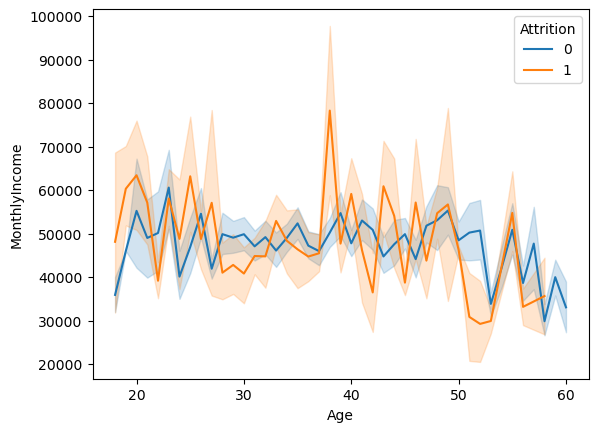

In [253]:
plt.plot(figsize=(15,6))
sns.lineplot(data=data,x='Age',y='MonthlyIncome',hue='Attrition')
plt.show()

# what is effect of Salary  on attrition ?

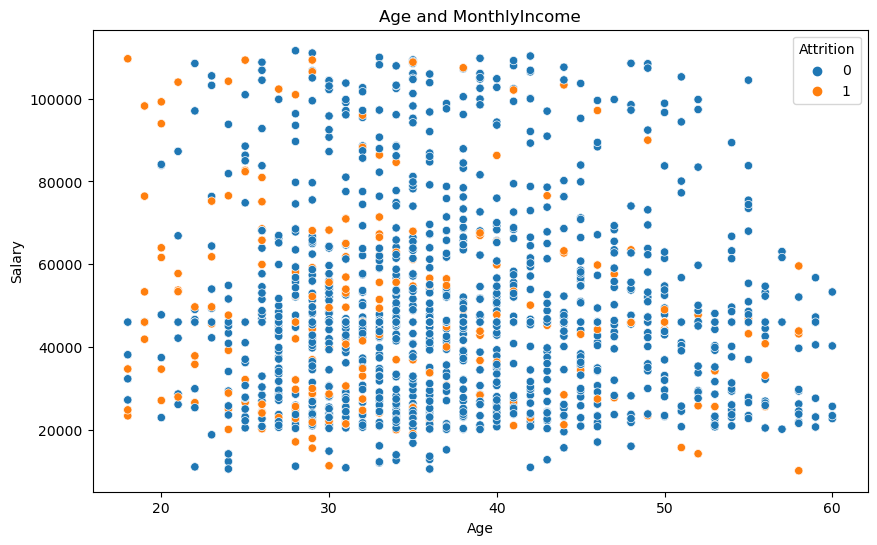

In [255]:
plt.figure(figsize=(10, 6))                                         
sns.scatterplot(data=data, x='Age', y='MonthlyIncome', hue='Attrition')
plt.title('Age and MonthlyIncome')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

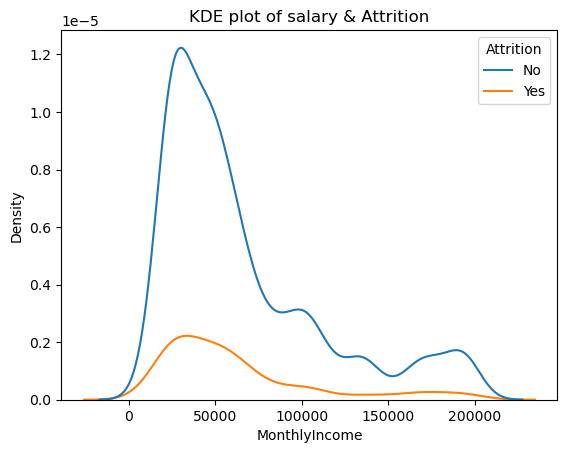

In [257]:
plt.plot(figsize=(10,6))
sns.kdeplot(data=dataset,x='MonthlyIncome',hue='Attrition')
plt.title('KDE plot of salary & Attrition')
plt.show()

In [324]:
data['PercentSalaryHike'].value_counts().to_frame()

,count
PercentSalaryHike,
11,630
13,627
14,603
12,594
15,303
18,267
17,246
16,234
19,228


In [325]:
dataset.groupby(['MonthlyIncome'])['PercentSalaryHike'].value_counts().to_frame()

,,count
MonthlyIncome,PercentSalaryHike,
10090,13,3
10510,14,3
10520,13,3
10810,11,3
10910,22,3
...,...,...
198590,19,3
199260,11,3
199430,13,3


Text(0, 0.5, 'Salary Hike')

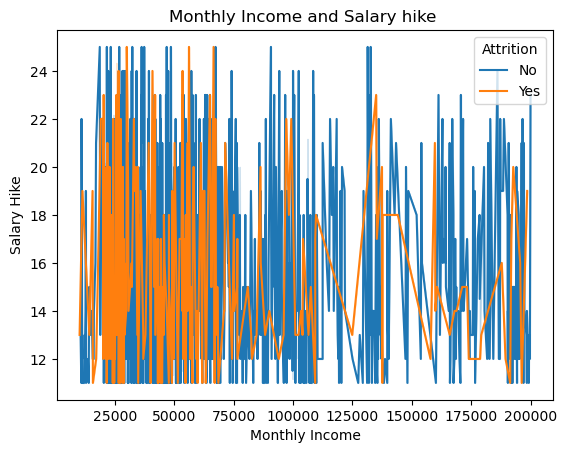

In [330]:
plt.plot(figure=(10,6))
sns.lineplot(data=dataset,x='MonthlyIncome',y='PercentSalaryHike',hue='Attrition')
plt.title('Monthly Income and Salary hike ')
plt.xlabel('Monthly Income')
plt.ylabel('Salary Hike')

# Which Education Field is more likely to leave?

In [290]:
dataset['EducationField'].value_counts().to_frame()

,count
EducationField,
Life Sciences,1818
Medical,1392
Marketing,477
Technical Degree,396
Other,246
Human Resources,81


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

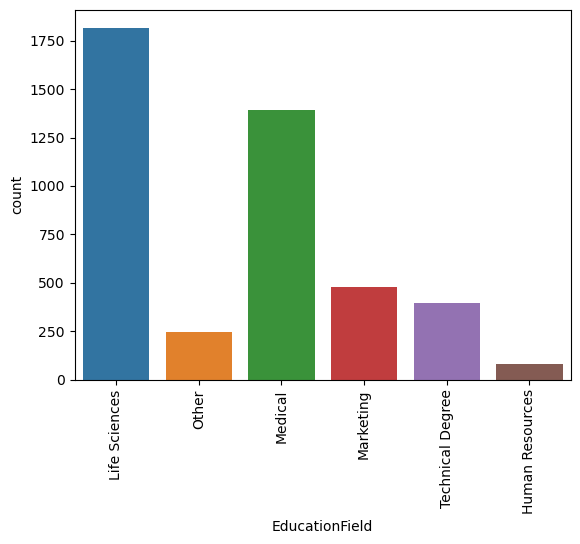

In [263]:
sns.countplot(data=dataset,x='EducationField')
plt.xticks(rotation=90)

<Axes: ylabel='count'>

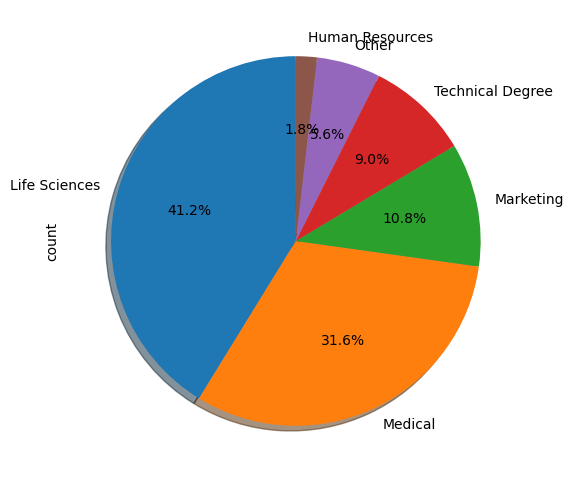

In [269]:
dataset['EducationField'].value_counts().sort_values(ascending=False).plot(kind='pie',figsize=(10,6),
                                                    autopct='%1.1f%%',startangle=90,shadow=True)

In [270]:
# from the above analysis 
# 41.2% employees belongs to Life Sciences 
# 31.6% employees belongs to Medical
# 10.8% employees belongs to Marketing
# 9% employees belongs to Technical Degree
# 1.8% employees belongs to Human Resources
# 5.6% employees belongs to others
# and we conclude most of the employees belongs to Life Sceince and Medical

In [289]:
dataset.groupby(['EducationField'])[['Attrition']].value_counts().to_frame()

count
EducationField   Attrition       
Human Resources  No            48
                 Yes           33
Life Sciences    No          1515
                 Yes          303
Marketing        No           402
                 Yes           75
Medical          No          1167
                 Yes          225
Other            No           216
                 Yes           30
Technical Degree No           351
                 Yes           45

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

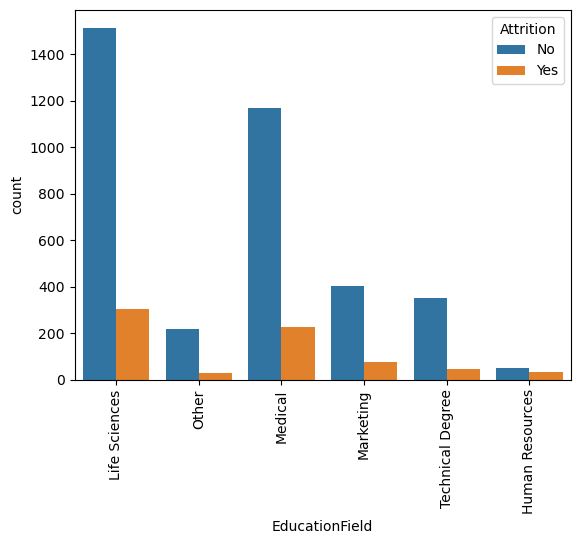

In [280]:
sns.countplot(data=dataset,x='EducationField',hue='Attrition')
plt.xticks(rotation=90)

In [281]:
# from the Above analysis 
#Life Sciences has more Attrition 

# What is the effect of work-life balance on total attrition rates?

In [288]:
data['WorkLifeBalance'].value_counts().to_frame()

,count
WorkLifeBalance,
3,2698
2,1019
4,454
1,239


In [287]:
data.groupby(['WorkLifeBalance'])['Attrition'].value_counts().to_frame()

count
WorkLifeBalance Attrition       
1               0            164
                1             75
2               0            848
                1            171
3               0           2314
                1            384
4               0            373
                1             81

In [298]:
data.columns

Index(['Age', 'DistanceFromHome', 'Education', 'Gender', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Dir

# what is effect of Years with Current Manager on attrition ?

In [300]:
data['YearsWithCurrManager'].value_counts().to_frame()

,count
YearsWithCurrManager,
2,1032
0,789
3,726
7,648
8,321
4,294
1,228
9,192
5,93


In [302]:
data.groupby(['YearsWithCurrManager'])['Attrition'].value_counts().to_frame()

count
YearsWithCurrManager Attrition       
0                    0            534
                     1            255
1                    0            195
                     1             33
2                    0            882
                     1            150
3                    0            651
                     1             75
4                    0            261
                     1             33
5                    0             81
                     1             12
6                    0             75
                     1             12
7                    0            555
                     1             93
8                    0            291
                     1             30
9                    0            174
                     1             18

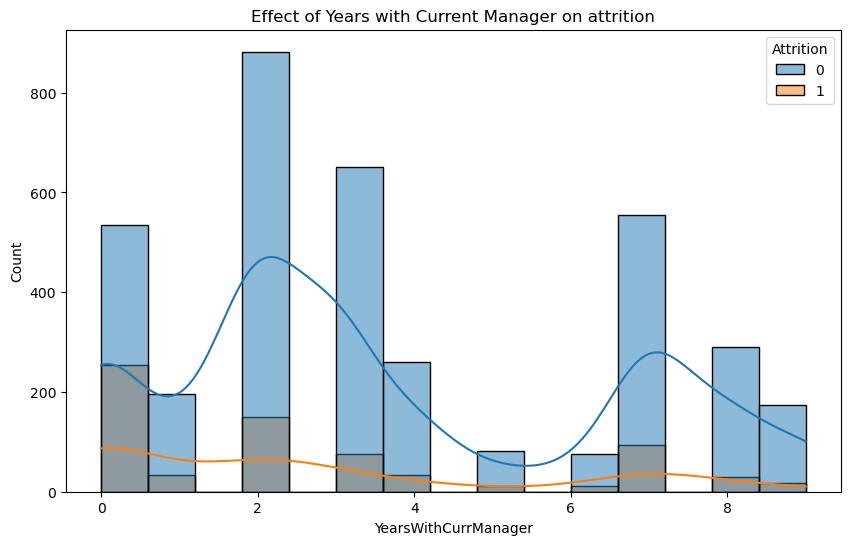

In [305]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='YearsWithCurrManager',hue='Attrition',kde=True)
plt.title('Effect of Years with Current Manager on attrition')
plt.show()

<Axes: xlabel='YearsWithCurrManager', ylabel='count'>

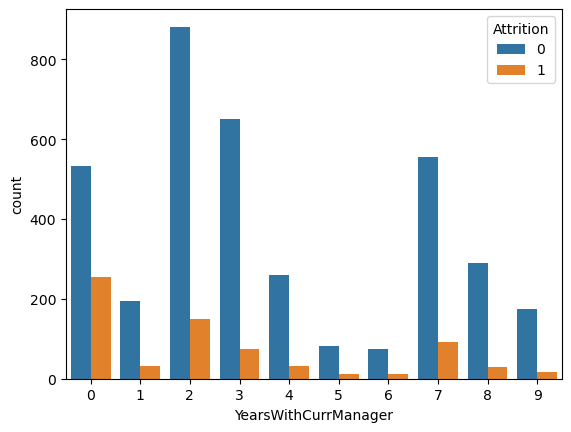

In [306]:
sns.countplot(data=data,x='YearsWithCurrManager',hue='Attrition')

In [307]:
# From the above the Analysis 
# The group with the highest attrition has worked with the current manager for 0 years. 
# The second-highest attrition rate currently seen among those who have worked with the current manager for two years  
# Then, attrition was observed among those who had worked with the current manager for more than seven years. 

# What is effect of Marriage on Attrition?

In [314]:
dataset['MaritalStatus'].value_counts().to_frame()

,count
MaritalStatus,
Married,2019
Single,1410
Divorced,981


In [317]:
dataset.groupby(['MaritalStatus'])['Attrition'].value_counts().to_frame()

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


count
MaritalStatus Attrition       
Divorced      No           882
              Yes           99
Married       No          1767
              Yes          252
Single        No          1050
              Yes          360

In [318]:
# from the above Analysis 
# Most of the employee leaving are mostly single 
# and second most are married 

In [319]:
dataset.columns

Index(['EmployeeID', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition'],
      dtype='object')

# What is effect of Total working Years on Attrition?

In [333]:
data['TotalWorkingYears'].value_counts().to_frame()

,count
TotalWorkingYears,
10,614
9,539
6,375
8,307
5,264
7,243
1,242
4,189
12,144


In [339]:
data.groupby(['TotalWorkingYears'])['Attrition'].value_counts().

count
TotalWorkingYears Attrition       
0                 0             18
                  1             15
1                 0            123
                  1            119
2                 0             66
                  1             27
3                 0             99
                  1             27
4                 0            153
                  1             36
5                 0            216
                  1             48
6                 0            309
                  1             66
7                 0            189
                  1             54
8                 0            260
                  1             47
9                 0            491
                  1             48
10                0            537
                  1             77
11                0             85
                  1             21
12                0            129
                  1             15
13                0             99
                  1              9
14                0             81
                  1             12
15                0            105
                  1             15
16                0            102
                  1              9
17                0             90
                  1              9
18                0             69
                  1             12
19                0             57
                  1              9
20                0             83
                  1              6
21                0             99
                  1              3
22                0             56
                  1              6
23                0             60
                  1              6
24                0             45
                  1              9
25                0             39
                  1              3
26                0             39
                  1              3

<Axes: xlabel='TotalWorkingYears', ylabel='count'>

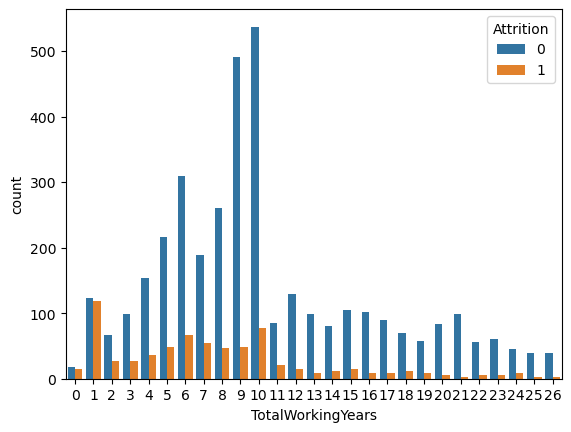

In [340]:
sns.countplot(data=data,x='TotalWorkingYears',hue='Attrition')

In [341]:
# from the above the analysis 
# employees are leaving after 1 year of experince (attrition rate is more) 

# What is effect of Year Since Last Promotion has  on Attrition?

In [346]:
data['YearsSinceLastPromotion'].value_counts().to_frame()

,count
YearsSinceLastPromotion,
0,1743
1,1716
2,477
4,183
3,156
5,135


<Axes: ylabel='count'>

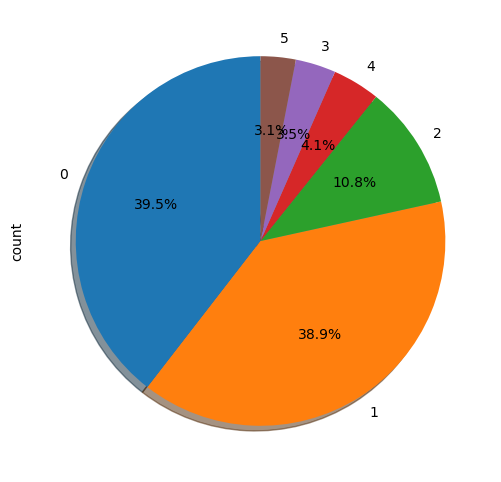

In [344]:
data['YearsSinceLastPromotion'].value_counts().sort_values(ascending=False).plot(kind='pie',figsize=(10,6),
                                             autopct='%1.1f%%',startangle=90,shadow=True)

In [350]:
#from the above analysis
#most of employees who got promotion less than 1 years has more attrition rate
#employees who got  promoted 1 years back has 2 nd most attrtion rate 

In [348]:
data.groupby(['YearsSinceLastPromotion'])['Attrition'].value_counts().to_frame()

count
YearsSinceLastPromotion Attrition       
0                       0           1413
                        1            330
1                       0           1464
                        1            252
2                       0            396
                        1             81
3                       0            129
                        1             27
4                       0            168
                        1             15
5                       0            129
                        1              6

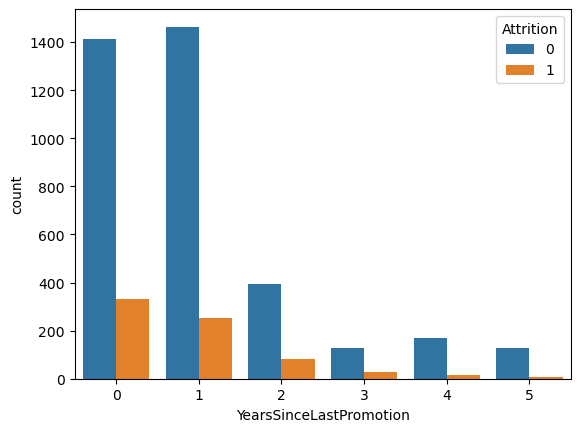

In [349]:
sns.countplot(data=data,x='YearsSinceLastPromotion',hue='Attrition')
plt.show()

In [351]:
#from the above analysis
#most of employees who got promotion less than 1 years has more attrition rate
#employees who got  promoted 1 years back has 2 nd most attrtion rate 

# what is effect of Environment Satisfaction on Attrition?

In [354]:
data['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
3    1375
4    1334
2     856
1     845
Name: count, dtype: int64

<Axes: ylabel='count'>

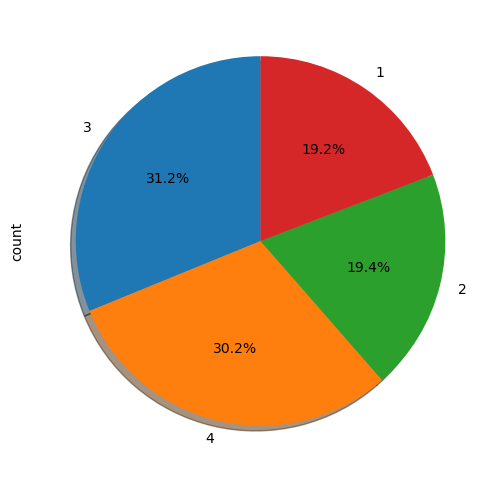

In [355]:
data['EnvironmentSatisfaction'].value_counts().plot(kind='pie',figsize=(10,6),autopct='%1.1f%%',startangle=90,shadow=True)

In [356]:
# from the above analysis
# we consider 1 : poor , 2 : Statisfactory ,3: good , 4: Excellent

<Axes: xlabel='EnvironmentSatisfaction', ylabel='Density'>

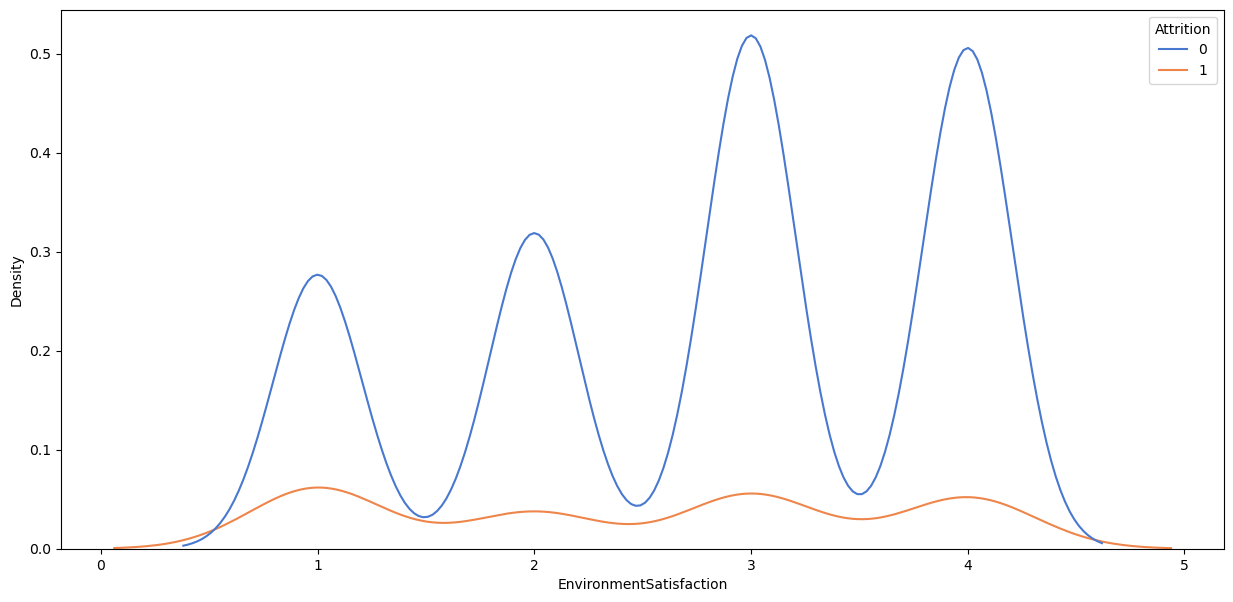

In [369]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=data, x = "EnvironmentSatisfaction", hue="Attrition", palette='muted')

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

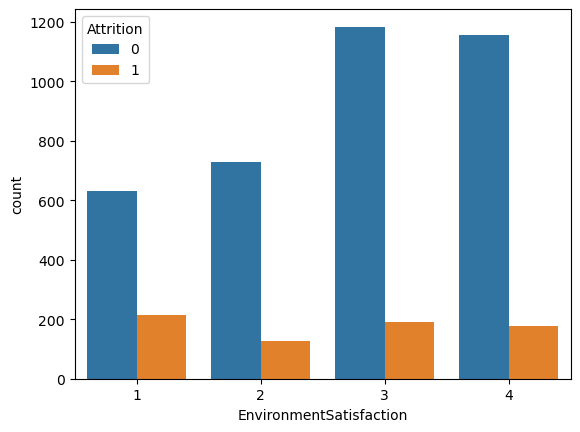

In [360]:
sns.countplot(data=data,x='EnvironmentSatisfaction',hue='Attrition')

In [ ]:
# from the above analysis 
# There is more attrition in areas with environment satisfaction levels of 1. 
# and 1 we already considered as (poor)

# What is effect of Job satisfaction on Attrition?

In [373]:
data['JobSatisfaction'].value_counts()

JobSatisfaction
4    1367
3    1343
1     860
2     840
Name: count, dtype: int64

<Axes: ylabel='count'>

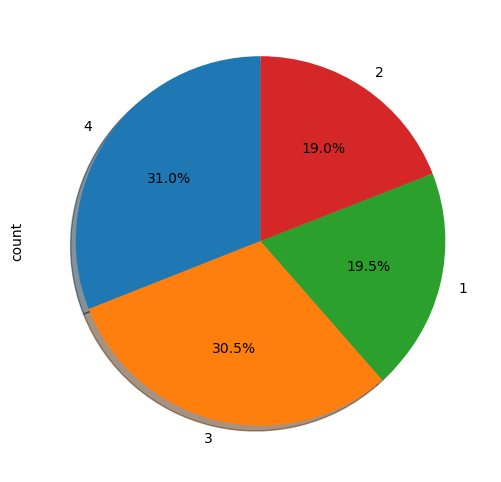

In [374]:
data['JobSatisfaction'].value_counts().plot(kind='pie',figsize=(10,6),autopct='%1.1f%%',startangle=90,shadow=True)

In [375]:
data.groupby(['JobSatisfaction'])['Attrition'].value_counts().to_frame()

count
JobSatisfaction Attrition       
1               0            663
                1            197
2               0            702
                1            138
3               0           1123
                1            220
4               0           1211
                1            156

<Axes: xlabel='JobSatisfaction', ylabel='count'>

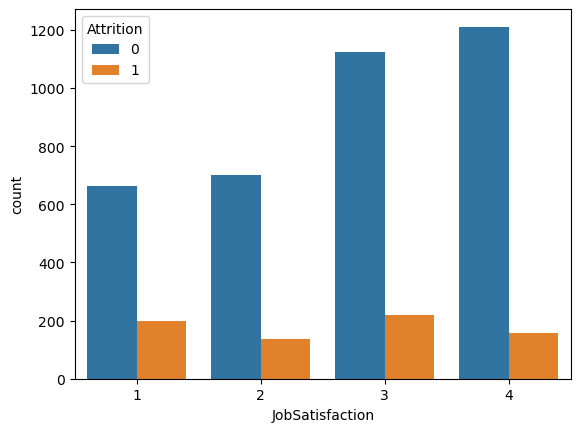

In [377]:
sns.countplot(data=data,x="JobSatisfaction",hue='Attrition')

<Axes: xlabel='JobSatisfaction', ylabel='Density'>

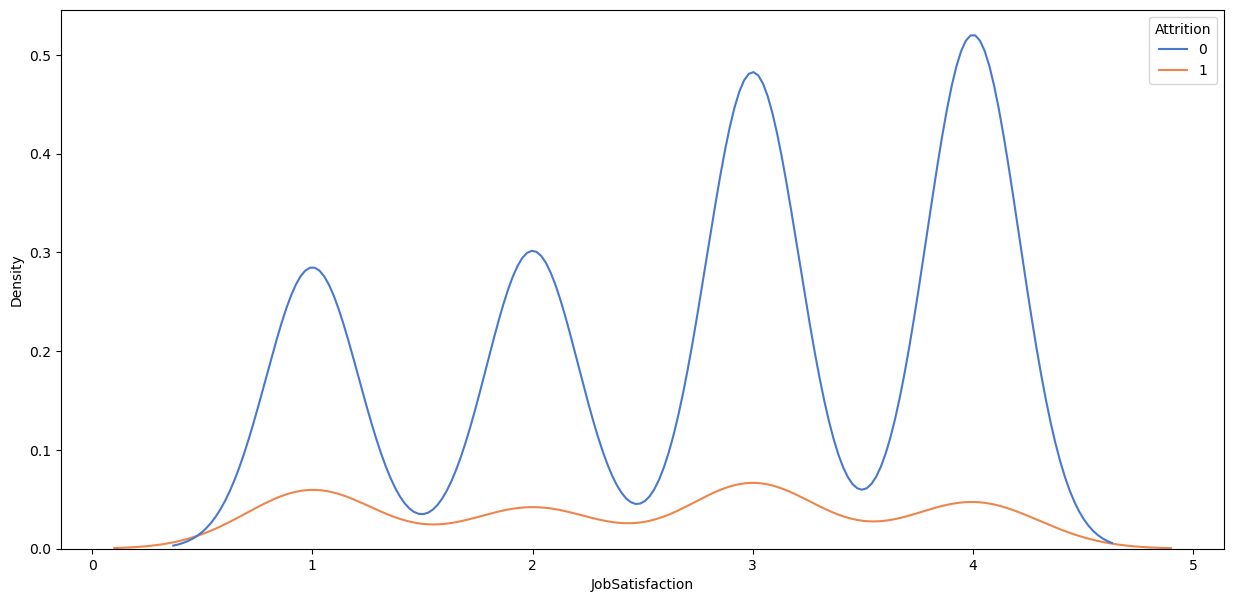

In [376]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=data, x = "JobSatisfaction", hue="Attrition", palette='muted')

In [ ]:
# from the above analysis 
# Attrition has been highest where jobSatisfaction  level is 3 

# What is effect of Job Involvement on Attrition?

In [366]:
data['JobInvolvement'].value_counts()

JobInvolvement
3    2604
2    1125
4     432
1     249
Name: count, dtype: int64

<Axes: ylabel='count'>

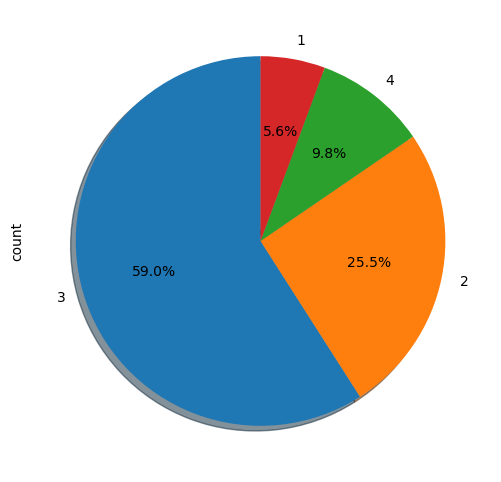

In [370]:
data['JobInvolvement'].value_counts().plot(kind='pie',figsize=(10,6),autopct='%1.1f%%',startangle=90,shadow=True)

In [371]:
#59% of workers are highly involved, or involved at a level of 3.

In [368]:
data.groupby(['JobInvolvement'])['Attrition'].value_counts().to_frame()

count
JobInvolvement Attrition       
1              0            195
               1             54
2              0            945
               1            180
3              0           2205
               1            399
4              0            354
               1             78

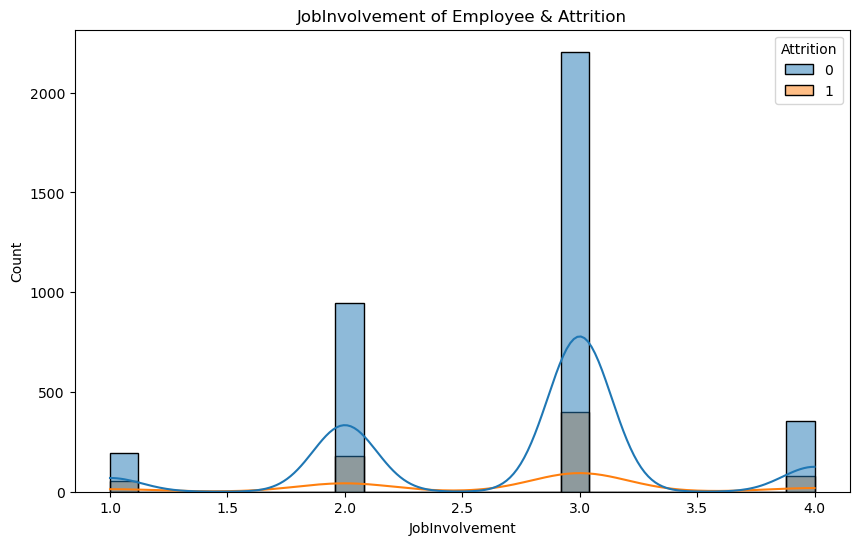

In [372]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='JobInvolvement',hue='Attrition',kde=True)
plt.title('JobInvolvement of Employee & Attrition')
plt.show()

In [378]:
# from the above analysis 
# Attrition has been highest where jobinvolvement level is 3 
# and number of the attrition on level 3 is 399

In [379]:
dataset.columns

Index(['EmployeeID', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition'],
      dtype='object')

In [380]:
data['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    2698
2    1019
4     454
1     239
Name: count, dtype: int64

<Axes: ylabel='count'>

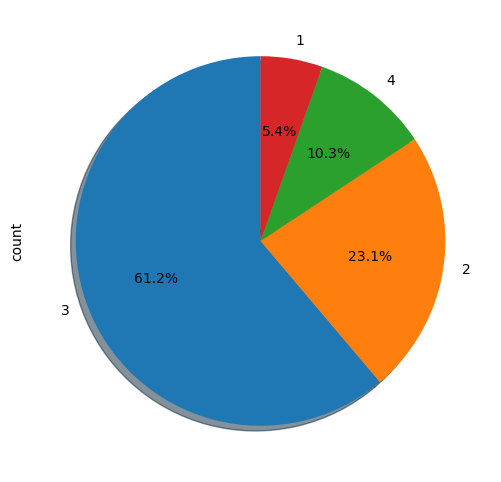

In [381]:
data['WorkLifeBalance'].value_counts().plot(kind='pie',figsize=(10,6),autopct='%1.1f%%',startangle=90,shadow=True)

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

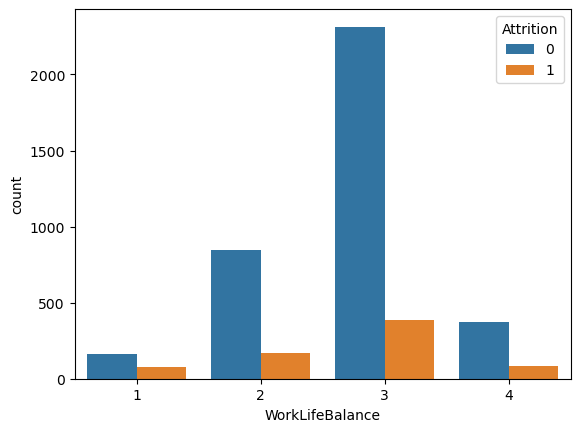

In [382]:
sns.countplot(data=data,x="WorkLifeBalance",hue='Attrition')

<Axes: xlabel='WorkLifeBalance', ylabel='Density'>

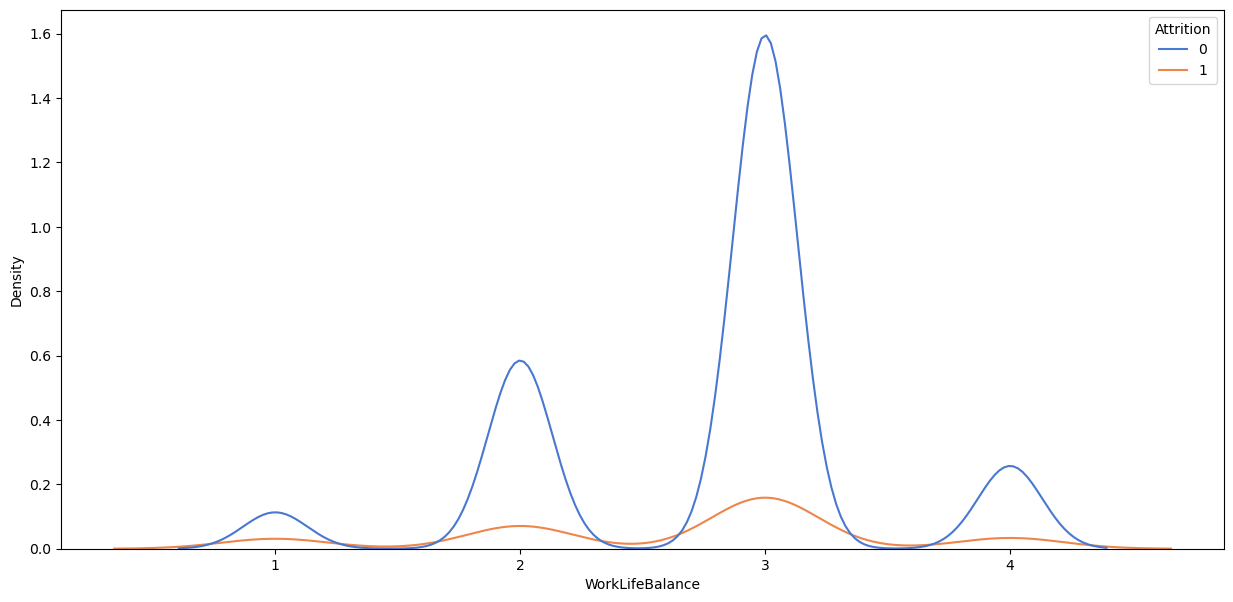

In [383]:
plt.figure(figsize=(15,7))
sns.kdeplot(data=data, x = "WorkLifeBalance", hue="Attrition", palette='muted')

In [384]:
# from the above analysis 
# The employees with good work life balance has highest attrtition rate

#                           Computation of Statistical Significance (Of features) 

In [385]:
spearman_coef,p_value = stats.spearmanr(data["EnvironmentSatisfaction"],data["Attrition"])
print("Spearman Correlation Co-effecient :", spearman_coef, "P-Value of p:",p_value)

Spearman Correlation Co-effecient : -0.09485565165629808 P-Value of p: 2.7615206837292285e-10


In [ ]:
# Based on the above analysis it can be concluded that as the p-value < 0.005  and has weak negative correlation 
#the correlation between the variables EnvironmentSatisfaction and Attrition is Statistically Significant

In [386]:
pearson_coef,p_value = stats.pearsonr(data["WorkLifeBalance"],data["Attrition"])
print("Pearson Correlation Co-effecient :", pearson_coef, "P-Value of p :", p_value)

Pearson Correlation Co-effecient : -0.06297475503300919 P-Value of p : 2.8518435493284955e-05


In [387]:
spearman_coef,p_value = stats.spearmanr(data["WorkLifeBalance"],data["Attrition"])
print("Spearman Correlation Co-effecient :", spearman_coef, "P-Value of p:",p_value)

Spearman Correlation Co-effecient : -0.05058379891345538 P-Value of p: 0.0007784116840868823


In [ ]:
#from the above analysis which  shows very weak linear negative correlation between worklifebalance & Attrition
#and p-value < 0.05 and its statistically significant 

In [388]:
pearson_coef,p_value = stats.pearsonr(data["JobSatisfaction"],data["Attrition"])
print("Pearson Correlation Co-effecient :", pearson_coef, "P-Value of p :", p_value)

Pearson Correlation Co-effecient : -0.10306828094181958 P-Value of p : 6.843826993015489e-12


In [389]:
spearman_coef,p_value = stats.spearmanr(data["JobSatisfaction"],data["Attrition"])
print("Spearman Correlation Co-effecient :", spearman_coef, "P-Value of p:",p_value)

Spearman Correlation Co-effecient : -0.10226075249376539 P-Value of p: 9.976592604473291e-12


In [ ]:
#from the above analysis which  shows very weak linear negative correlation between jobsatisfaction & Attrition
#and p-value is very less than   0.05(considered as threshold) and its statistically significant 

In [391]:
pearson_coef,p_value = stats.pearsonr(data["DistanceFromHome"],data["Attrition"])
print("Pearson Correlation Co-effecient :", pearson_coef, "P-Value of p :", p_value)

Pearson Correlation Co-effecient : -0.00973014101017966 P-Value of p : 0.5182860428055663


In [392]:
spearman_coef,p_value = stats.spearmanr(data["DistanceFromHome"],data["Attrition"])
print("Spearman Correlation Co-effecient :", spearman_coef, "P-Value of p:",p_value)

Spearman Correlation Co-effecient : -0.0014021001176374292 P-Value of p: 0.9258367664843244


In [ ]:
#from the above analysis which  shows very weak linear negative correlation between  DistanceFromeHome & Attrition
# and p-value > 0.05 (considered as threshold) and correlation is not statistically significant

In [397]:
pearson_coef,p_value = stats.pearsonr(data["MonthlyIncome"],data["Attrition"])
print("Pearson Correlation Co-effecient :", pearson_coef, "P-Value of p :", p_value)

Pearson Correlation Co-effecient : -0.007681122072106354 P-Value of p : 0.6100867883816697


In [396]:
spearman_coef,p_value = stats.spearmanr(data["MonthlyIncome"],data["Attrition"])
print("Spearman Correlation Co-effecient :", spearman_coef, "P-Value of p:",p_value)

Spearman Correlation Co-effecient : -0.004079985688578378 P-Value of p: 0.7864930814351779


In [398]:
#from the above analysis which  shows extremely  weak linear negative correlation between Monthly & Attrition
# and p-value > 0.05 (considered as threshold) and correlation is not statistically significant